# import libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.io
import warnings
warnings.filterwarnings('ignore')
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler, LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, log_loss, jaccard_score, precision_score, recall_score, f1_score
from mlxtend.plotting import plot_decision_regions
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
from sklearn.linear_model import Perceptron
from sklearn.utils import shuffle
import statsmodels.api as sm
from sklearn.naive_bayes import GaussianNB
import __main__
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder


# Question 1  

## section 1

### reading the data

In [ ]:
from sklearn import datasets
import pandas as pd

iris = datasets.load_iris()

df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = iris.target
df['target_name'] = df['target'].map(dict(enumerate(iris.target_names)))
df.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


### EDA

In [ ]:
print(iris.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [ ]:
# Number of features
len(iris.feature_names)

4

In [ ]:
df.shape

(150, 6)

In [ ]:
# Value counts (Balanced)
df['target_name'].value_counts()

target_name
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

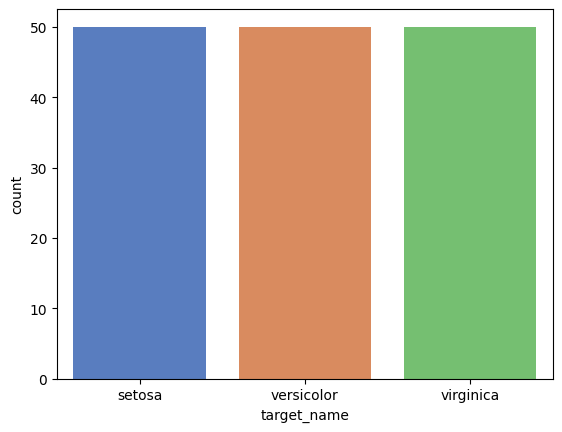

In [ ]:
sns.countplot(x='target_name',data=df, palette="muted");

In [ ]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [ ]:
mean = df.groupby('target_name').mean()
mean

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
target_name,,,,,
setosa,5.006,3.428,1.462,0.246,0.0
versicolor,5.936,2.770,4.260,1.326,1.0
virginica,6.588,2.974,5.552,2.026,2.0


In [ ]:
med = df.groupby('target_name').median()
med

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
target_name,,,,,
setosa,5.0,3.4,1.50,0.2,0.0
versicolor,5.9,2.8,4.35,1.3,1.0
virginica,6.5,3.0,5.55,2.0,2.0


In [ ]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
 5   target_name        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


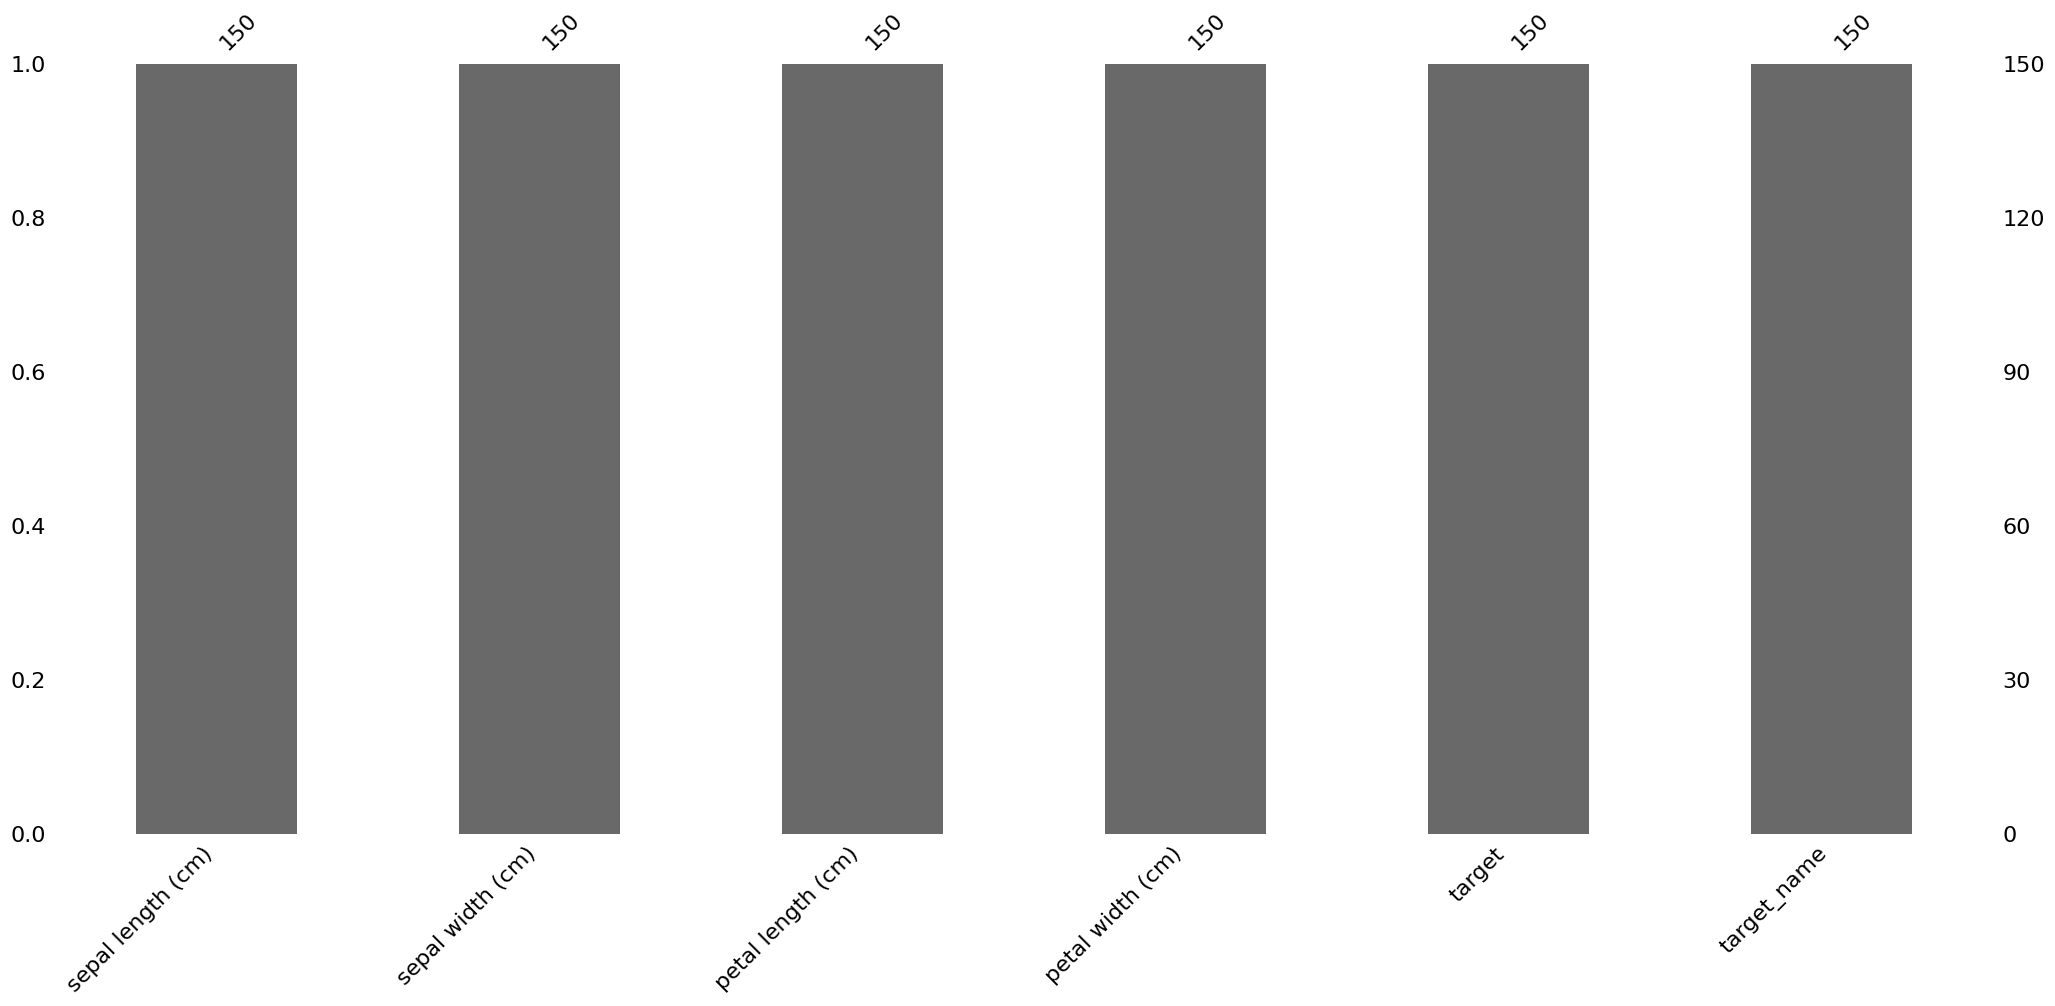

In [ ]:
import missingno as msno
p=msno.bar(df)

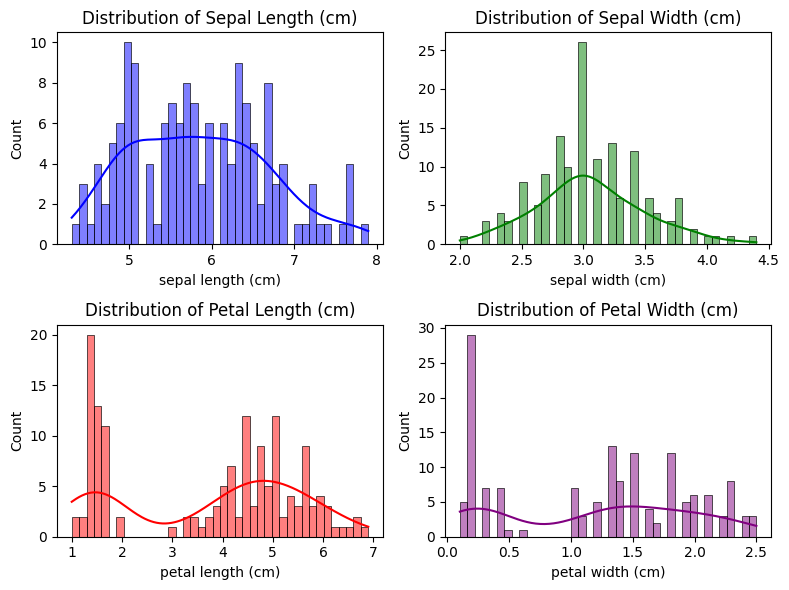

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(8, 6))

sns.histplot(df['sepal length (cm)'], bins=40, color='blue', ax=axs[0, 0], kde=True)
axs[0, 0].set_title('Distribution of Sepal Length (cm)')

sns.histplot(df['sepal width (cm)'], bins=40, color='green', ax=axs[0, 1], kde=True)
axs[0, 1].set_title('Distribution of Sepal Width (cm)')

sns.histplot(df['petal length (cm)'], bins=40, color='red', ax=axs[1, 0], kde=True)
axs[1, 0].set_title('Distribution of Petal Length (cm)')

sns.histplot(df['petal width (cm)'], bins=40, color='purple', ax=axs[1, 1], kde=True)
axs[1, 1].set_title('Distribution of Petal Width (cm)')

plt.tight_layout()
plt.show()


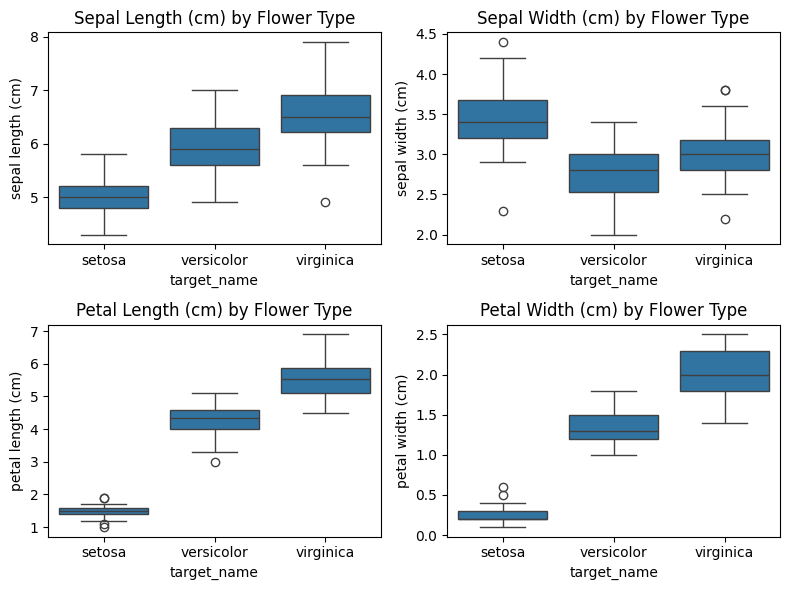

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(8, 6))

sns.boxplot(data=df, x='target_name', y='sepal length (cm)', ax=axs[0, 0])
axs[0, 0].set_title('Sepal Length (cm) by Flower Type')

sns.boxplot(data=df, x='target_name', y='sepal width (cm)', ax=axs[0, 1])
axs[0, 1].set_title('Sepal Width (cm) by Flower Type')

sns.boxplot(data=df, x='target_name', y='petal length (cm)', ax=axs[1, 0])
axs[1, 0].set_title('Petal Length (cm) by Flower Type')

sns.boxplot(data=df, x='target_name', y='petal width (cm)', ax=axs[1, 1])
axs[1, 1].set_title('Petal Width (cm) by Flower Type')

plt.tight_layout()
plt.show()


### corr matrix

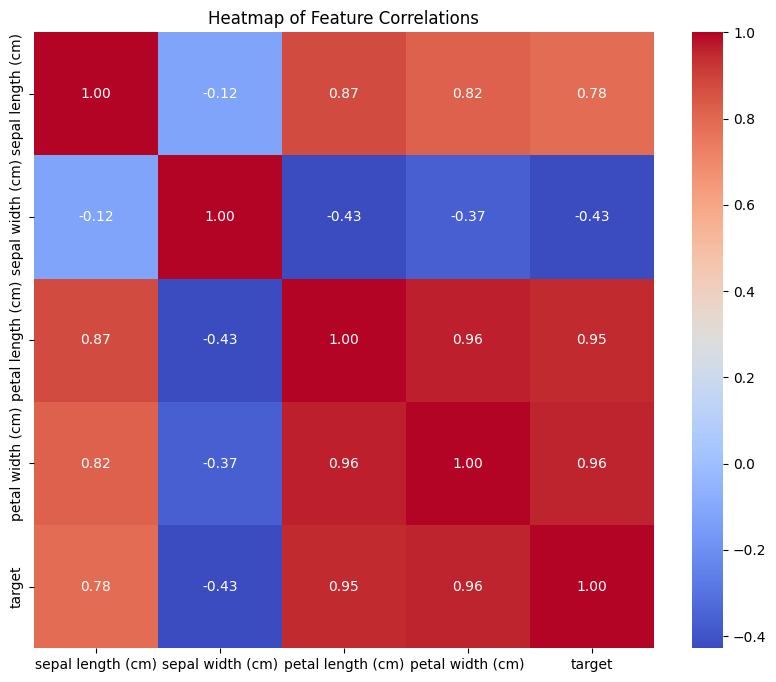

In [ ]:
correlation_matrix = df.iloc[:, :-1].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap of Feature Correlations')
plt.show()


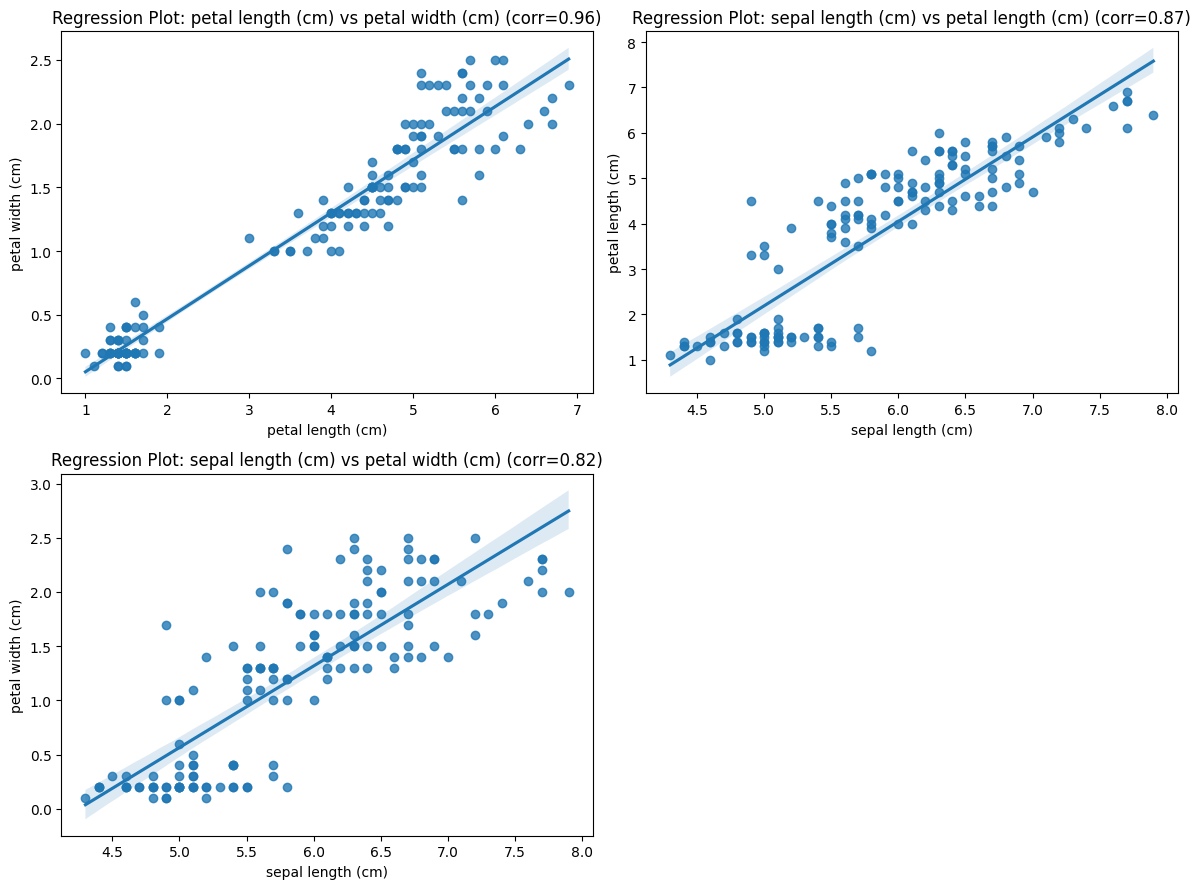

In [ ]:
correlation_matrix1 = df.iloc[:, :-2].corr()

high_corr_pairs = correlation_matrix1.unstack().sort_values(ascending=False).drop_duplicates()
high_corr_pairs = high_corr_pairs[high_corr_pairs < 1].nlargest(3)

plt.figure(figsize=(12, 9))

for i, (pair, corr) in enumerate(high_corr_pairs.items()):
    plt.subplot(2, 2, i+1)
    x, y = pair
    sns.regplot(x=x, y=y, data=df)
    plt.title(f'Regression Plot: {x} vs {y} (corr={corr:.2f})')

plt.tight_layout()
plt.show()


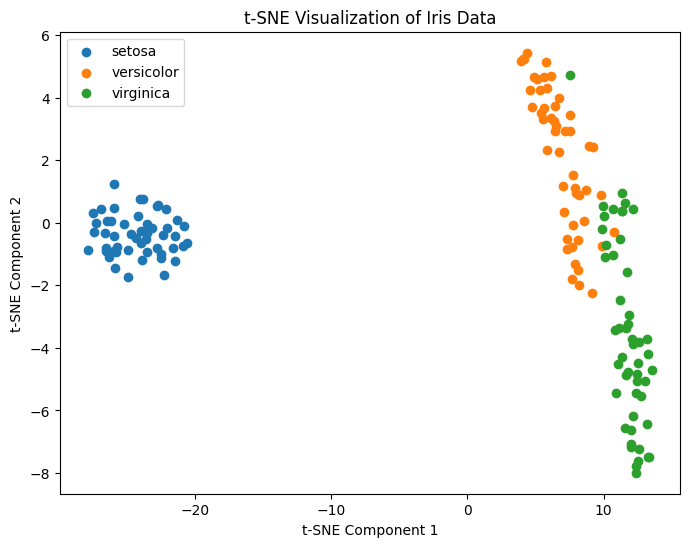

In [ ]:
# t-SNE
from sklearn.manifold import TSNE

df_tsne = df.copy()

tsne = TSNE(n_components=2, perplexity=30, random_state=54)

X_tsne = tsne.fit_transform(df[iris.feature_names])

df_tsne['tsne-2d-one'] = X_tsne[:, 0]
df_tsne['tsne-2d-two'] = X_tsne[:, 1]

plt.figure(figsize=(8, 6))
colors = ['C' + str(i) for i in range(len(iris.target_names))]
for target_name, color in zip(iris.target_names, colors):
    indices_to_plot = df_tsne['target_name'] == target_name
    plt.scatter(df_tsne.loc[indices_to_plot, 'tsne-2d-one'],
                df_tsne.loc[indices_to_plot, 'tsne-2d-two'],
                label=target_name)

plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title('t-SNE Visualization of Iris Data')
plt.legend()
plt.show()

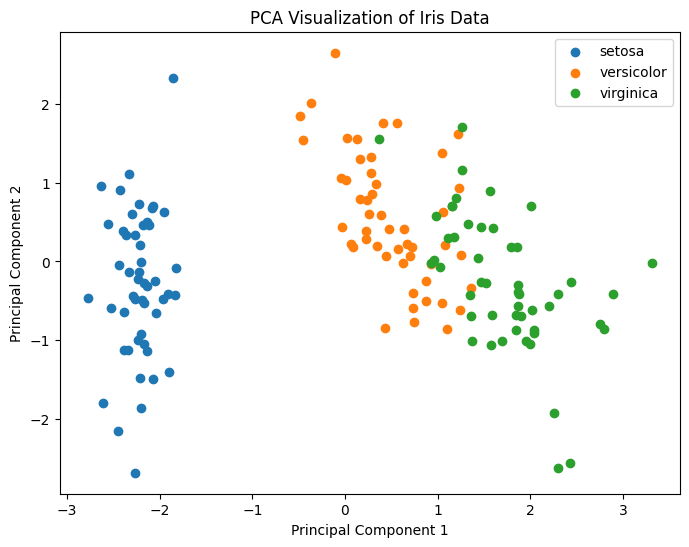

In [ ]:
# PCA
X = df[iris.feature_names].values
X_mean = np.mean(X, axis=0)
X_std = np.std(X, axis=0)
X_standardized = (X - X_mean) / X_std

cov_matrix = np.cov(X_standardized, rowvar=False)

eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

sorted_index = np.argsort(eigenvalues)[::-1]
sorted_eigenvalues = eigenvalues[sorted_index]
sorted_eigenvectors = eigenvectors[:, sorted_index]

# Select the top k eigenvectors (here we select top 2 for 2D visualization)
k = 2
eigenvector_subset = sorted_eigenvectors[:, 0:k]
X_reduced = np.dot(X_standardized, eigenvector_subset)

df_pca = pd.DataFrame(data=X_reduced, columns=['PC1', 'PC2'])
df_pca['target'] = df['target']
df_pca['target_name'] = df['target'].map(dict(enumerate(iris.target_names)))

plt.figure(figsize=(8, 6))
colors = ['C' + str(i) for i in range(len(iris.target_names))]
for target_name, color in zip(iris.target_names, colors):
    indices_to_plot = df_pca['target_name'] == target_name
    plt.scatter(df_pca.loc[indices_to_plot, 'PC1'],
                df_pca.loc[indices_to_plot, 'PC2'],
                label=target_name)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Visualization of Iris Data')
plt.legend()
plt.show()


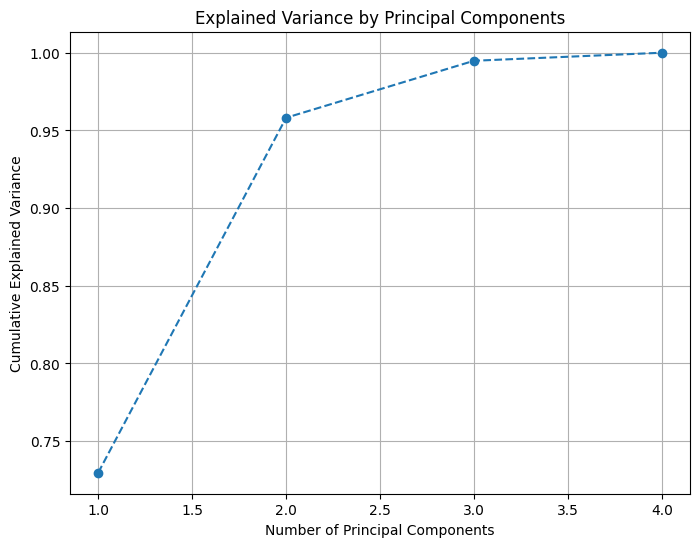

Explained variance by each component:  [0.72962445 0.22850762 0.03668922 0.00517871]
Cumulative explained variance:  [0.72962445 0.95813207 0.99482129 1.        ]


In [ ]:
# Standardize the Data
X = df[iris.feature_names].values
X_mean = np.mean(X, axis=0)
X_std = np.std(X, axis=0)
X_standardized = (X - X_mean) / X_std

# Perform PCA
pca = PCA()
X_pca = pca.fit_transform(X_standardized)

explained_variance = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance)

plt.figure(figsize=(8, 6))
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o', linestyle='--')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Principal Components')
plt.grid(True)
plt.show()

print("Explained variance by each component: ", explained_variance)
print("Cumulative explained variance: ", cumulative_explained_variance)


## section 2

### train test split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df[iris.feature_names], df['target'], test_size=0.2, random_state=54)
X_train.shape, y_train.shape, X_test.shape,  y_test.shape

((120, 4), (120,), (30, 4), (30,))

### scaling

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### model

In [ ]:
from sklearn.svm import SVC
svm_linear = SVC(kernel='linear', random_state=54)
svm_linear.fit(X_train, y_train)

y_pred = svm_linear.predict(X_test)

### results

In [ ]:
classification_rep_svm_linear = classification_report(y_test,y_pred)
print(classification_rep_svm_linear)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       0.85      1.00      0.92        11
           2       1.00      0.82      0.90        11

    accuracy                           0.93        30
   macro avg       0.95      0.94      0.94        30
weighted avg       0.94      0.93      0.93        30



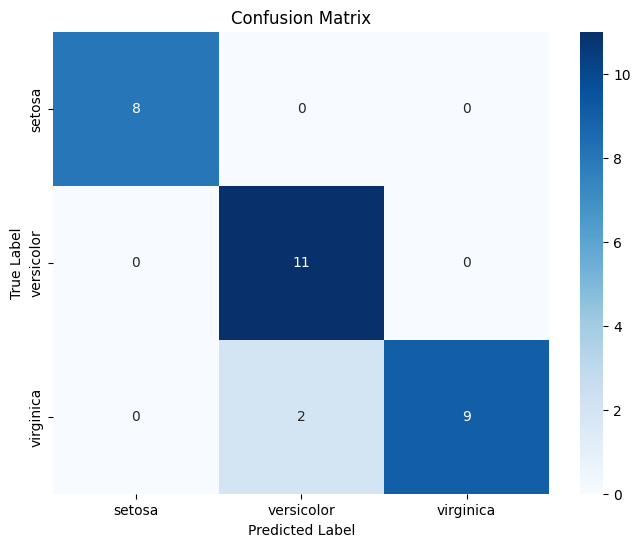

In [ ]:
conf_mat = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
svm_linear.n_support_

array([ 2, 12, 10], dtype=int32)

In [ ]:
svm_linear.support_vectors_

array([[-1.56834936, -1.76353227, -1.35247624, -1.14648579],
       [-0.85725897,  0.53923022, -1.12838629, -0.88836516],
       [ 0.20937661, -0.38187478,  0.44024339,  0.40223798],
       [ 0.09086155,  0.30895397,  0.60831085,  0.78941892],
       [-0.85725897, -1.30297977, -0.40009394, -0.11400328],
       [-0.50171377, -0.15159853,  0.44024339,  0.40223798],
       [ 0.44640674, -1.99380852,  0.44024339,  0.40223798],
       [ 1.03898207, -0.15159853,  0.72035583,  0.66035861],
       [-0.26468364, -0.15159853,  0.44024339,  0.40223798],
       [ 0.56492181, -1.30297977,  0.66433334,  0.40223798],
       [ 0.20937661, -0.84242728,  0.77637832,  0.53129829],
       [-1.0942891 , -1.53325602, -0.23202647, -0.24306359],
       [ 1.2760122 ,  0.07867772,  0.66433334,  0.40223798],
       [ 0.56492181,  0.53923022,  0.55228836,  0.53129829],
       [ 1.63155739, -0.15159853,  1.16853574,  0.53129829],
       [ 0.44640674, -0.61215103,  0.60831085,  0.78941892],
       [-1.0942891 , -1.

In [ ]:
print('weights : ',svm_linear.coef_[0] , 'bias : ',svm_linear.intercept_[0])

weights :  [-0.45102127  0.33270532 -0.9056233  -0.93941787] bias :  -1.422357085909998


### decision boundary

In [ ]:
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

svm_linear.fit(X_train_pca, y_train)

SVC(kernel='linear', random_state=54)

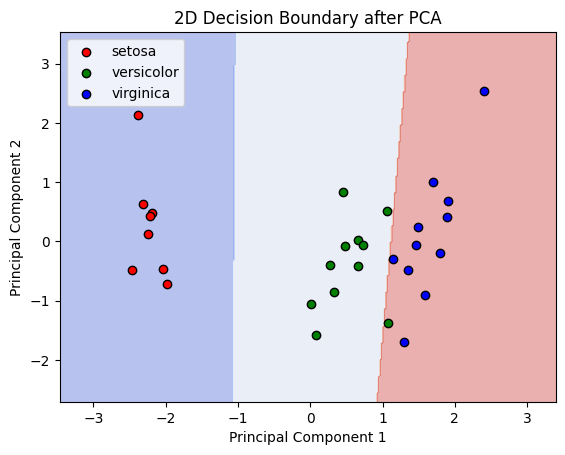

In [ ]:
x_min, x_max = X_test_pca[:, 0].min() - 1, X_test_pca[:, 0].max() + 1
y_min, y_max = X_test_pca[:, 1].min() - 1, X_test_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

Z = svm_linear.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.4, cmap=plt.cm.coolwarm)

colors = ['r', 'g', 'b']
target_names = iris.target_names
for i, color in zip(range(len(target_names)), colors):
    idx = np.where(y_test == i)
    plt.scatter(X_test_pca[idx, 0], X_test_pca[idx, 1], c=color, label=target_names[i], edgecolors='k')

plt.title('2D Decision Boundary after PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

## section 3

SVC with polynomial (degree 1) kernel: Accuracy = 0.93
SVC with polynomial (degree 2) kernel: Accuracy = 0.87
SVC with polynomial (degree 3) kernel: Accuracy = 0.83
SVC with polynomial (degree 4) kernel: Accuracy = 0.73
SVC with polynomial (degree 5) kernel: Accuracy = 0.80
SVC with polynomial (degree 6) kernel: Accuracy = 0.77
SVC with polynomial (degree 7) kernel: Accuracy = 0.77
SVC with polynomial (degree 8) kernel: Accuracy = 0.73
SVC with polynomial (degree 9) kernel: Accuracy = 0.77
SVC with polynomial (degree 10) kernel: Accuracy = 0.73


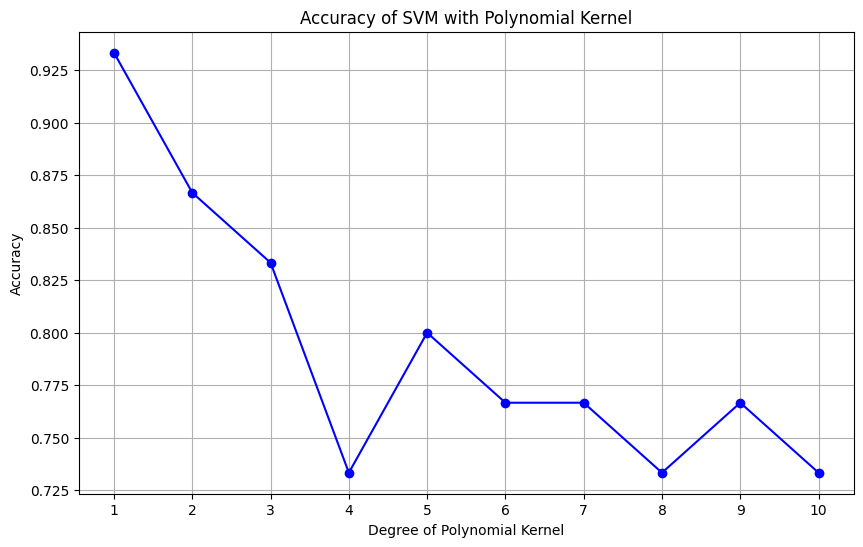

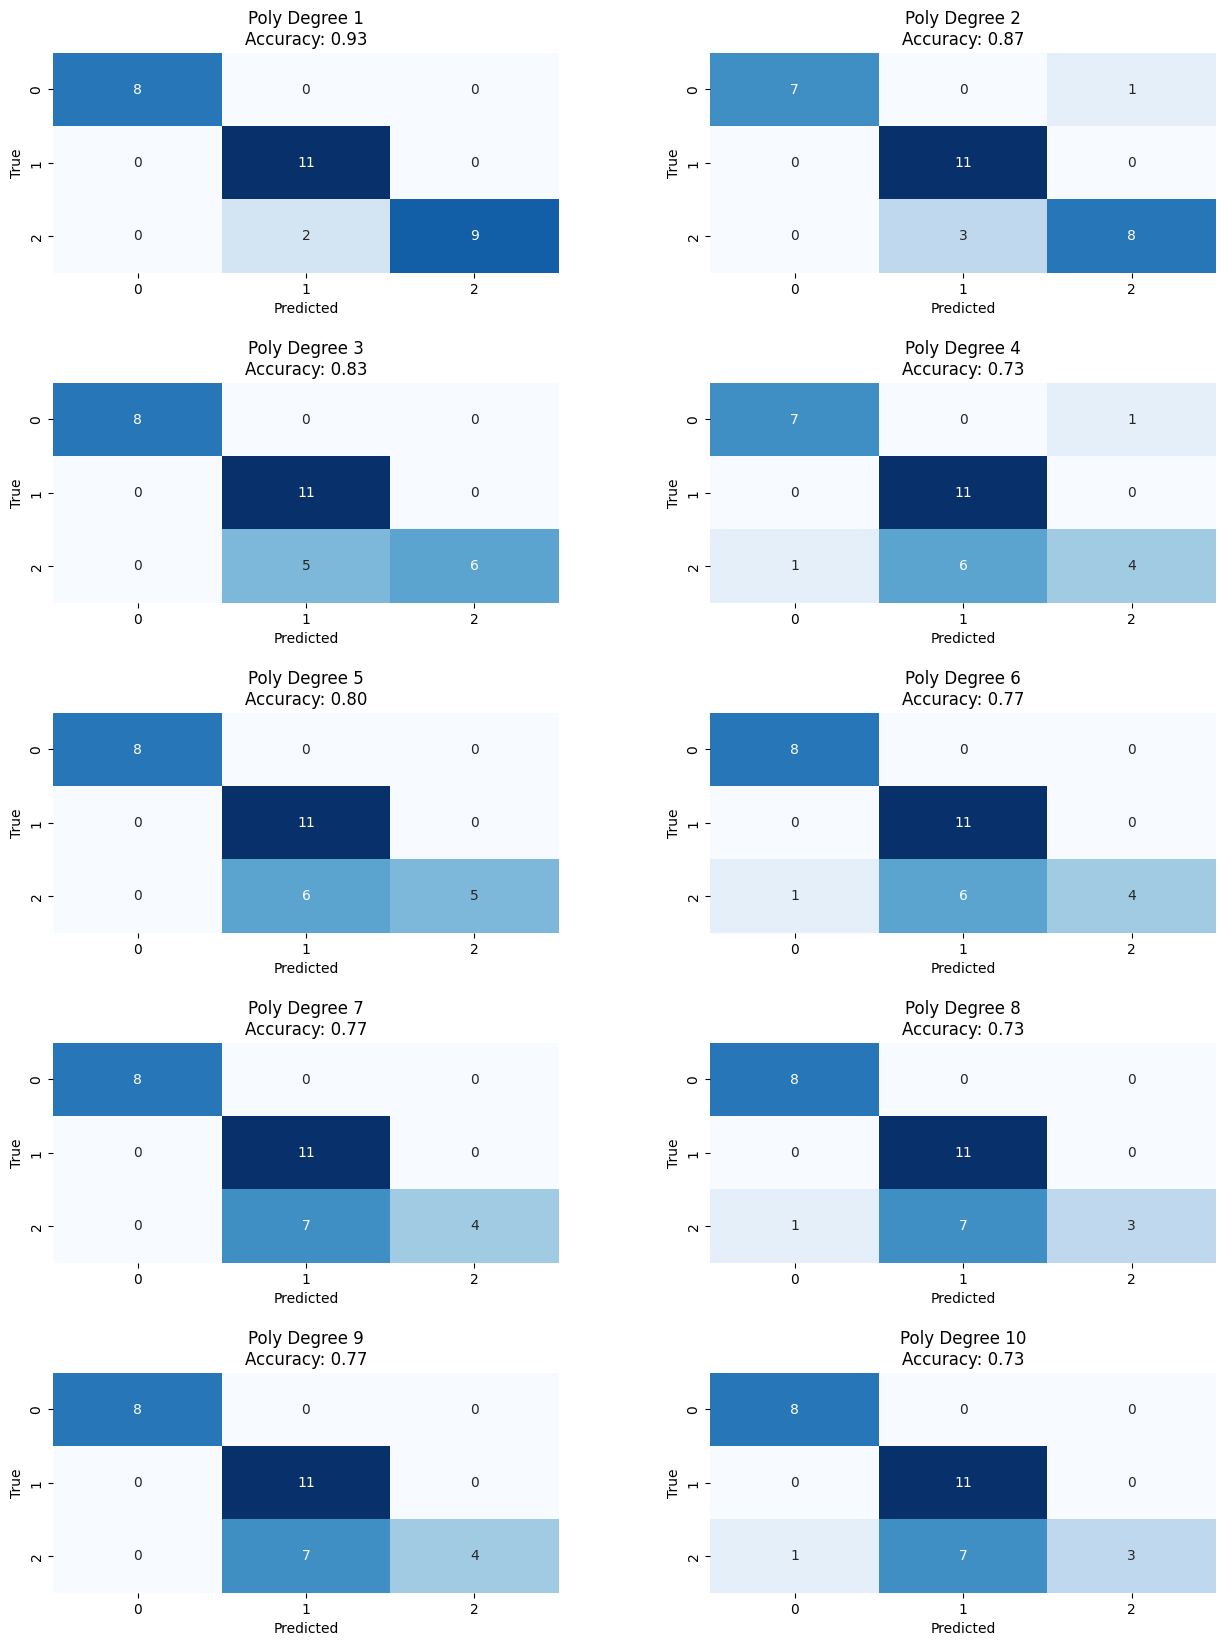

In [ ]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=54)

classifiers = [SVC(kernel='poly', degree=d, C=0.5) for d in range(1, 11)]

accuracies = []
degrees = range(1, 11)
conf_matrices = []

for clf in classifiers:
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
    conf_matrices.append(confusion_matrix(y_test, y_pred))

for degree, accuracy in zip(degrees, accuracies):
    print(f'SVC with polynomial (degree {degree}) kernel: Accuracy = {accuracy:.2f}')

plt.figure(figsize=(10, 6))
plt.plot(degrees, accuracies, marker='o', linestyle='-', color='b')
plt.title('Accuracy of SVM with Polynomial Kernel')
plt.xlabel('Degree of Polynomial Kernel')
plt.ylabel('Accuracy')
plt.xticks(degrees)
plt.grid(True)
plt.show()

fig, axes = plt.subplots(5, 2, figsize=(15, 20))
fig.subplots_adjust(hspace=0.5, wspace=0.3)
for i, (conf_matrix, degree, ax) in enumerate(zip(conf_matrices, degrees, axes.flatten())):
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, ax=ax)
    ax.set_title(f'Poly Degree {degree}\nAccuracy: {accuracies[i]:.2f}')
    ax.set_xlabel('Predicted')
    ax.set_ylabel('True')
plt.show()


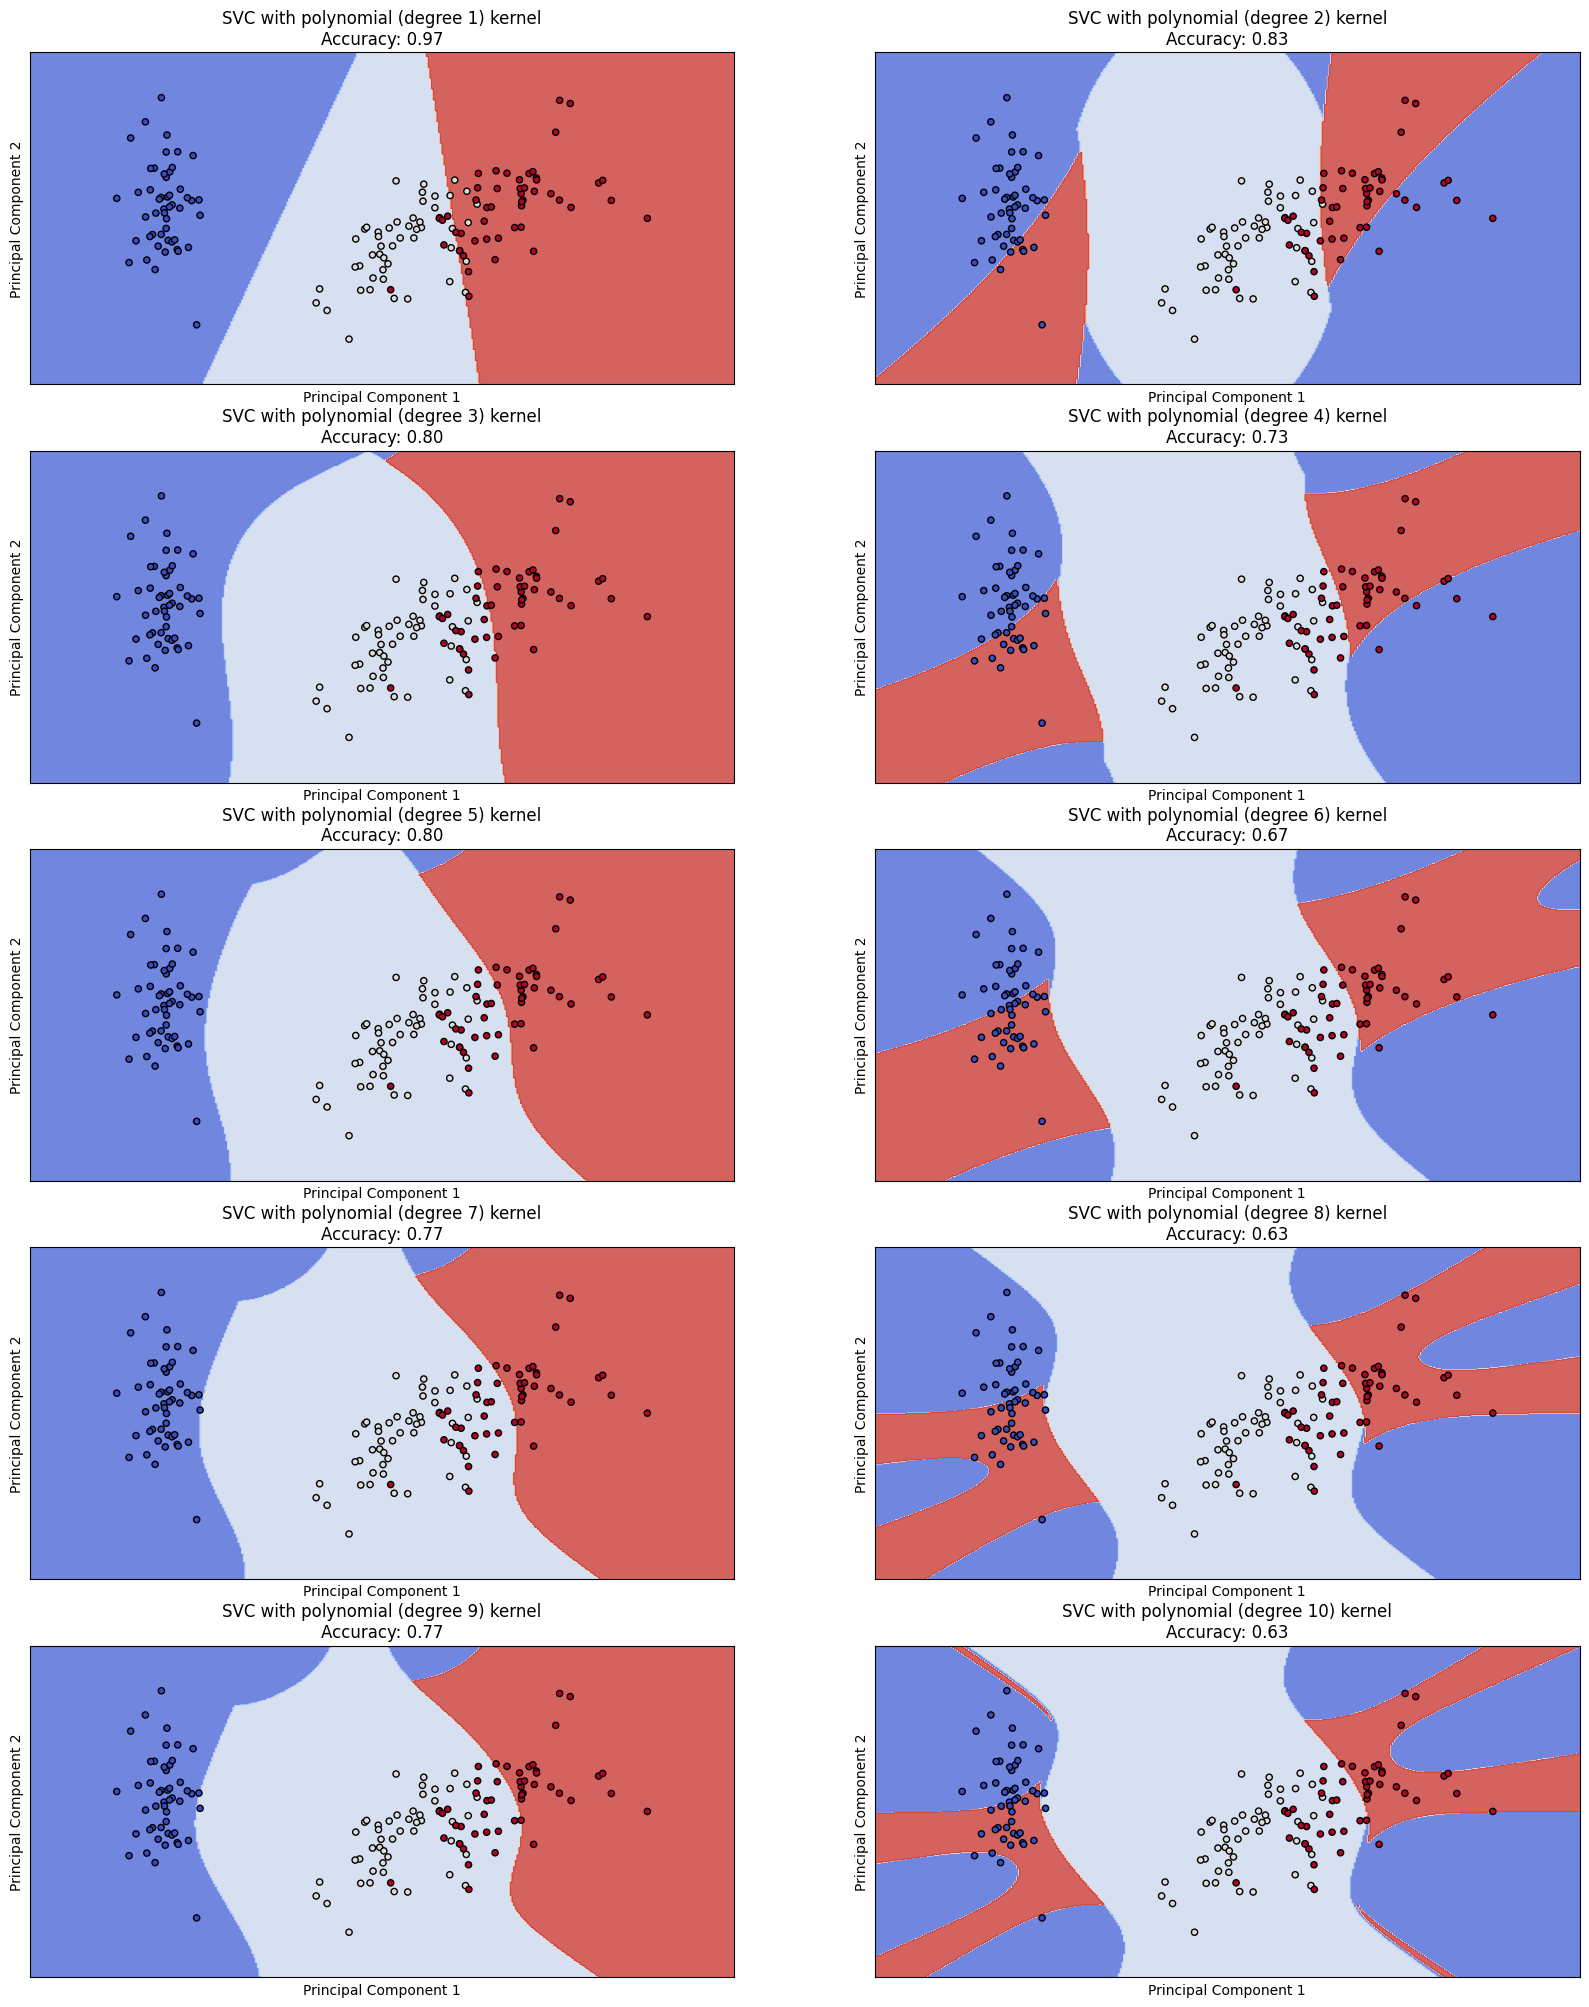

SVC with polynomial (degree 1) kernel: 0.97
SVC with polynomial (degree 2) kernel: 0.83
SVC with polynomial (degree 3) kernel: 0.80
SVC with polynomial (degree 4) kernel: 0.73
SVC with polynomial (degree 5) kernel: 0.80
SVC with polynomial (degree 6) kernel: 0.67
SVC with polynomial (degree 7) kernel: 0.77
SVC with polynomial (degree 8) kernel: 0.63
SVC with polynomial (degree 9) kernel: 0.77
SVC with polynomial (degree 10) kernel: 0.63


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Standardize the data
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Reduce dimensions with PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Create a DataFrame with PCA components and the target
df_pca = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
df_pca['target'] = y

# Extract X and y from the DataFrame
X = df_pca[['PC1', 'PC2']].values
y = df_pca['target'].values

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=54)

# Define classifiers
classifiers = [
    SVC(kernel='poly', degree=1, C=0.5),
    SVC(kernel='poly', degree=2, C=0.5),
    SVC(kernel='poly', degree=3, C=0.5),
    SVC(kernel='poly', degree=4, C=0.5),
    SVC(kernel='poly', degree=5, C=0.5),
    SVC(kernel='poly', degree=6, C=0.5),
    SVC(kernel='poly', degree=7, C=0.5),
    SVC(kernel='poly', degree=8, C=0.5),
    SVC(kernel='poly', degree=9, C=0.5),
    SVC(kernel='poly', degree=10, C=0.5),
]

# Titles for the plots
titles = ['SVC with polynomial (degree 1) kernel',
          'SVC with polynomial (degree 2) kernel',
          'SVC with polynomial (degree 3) kernel',
          'SVC with polynomial (degree 4) kernel',
          'SVC with polynomial (degree 5) kernel',
          'SVC with polynomial (degree 6) kernel',
          'SVC with polynomial (degree 7) kernel',
          'SVC with polynomial (degree 8) kernel',
          'SVC with polynomial (degree 9) kernel',
          'SVC with polynomial (degree 10) kernel',]

fig, sub = plt.subplots(5, 2, figsize=(20, 25))
plt.subplots_adjust(wspace=0.2, hspace=0.2)

X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

accuracies = []

for clf, title, ax in zip(classifiers, titles, sub.flatten()):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

    plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('Principal Component 1')
    ax.set_ylabel('Principal Component 2')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(f"{title}\nAccuracy: {accuracy:.2f}")

plt.show()

# Print accuracies
for title, accuracy in zip(titles, accuracies):
    print(f"{title}: {accuracy:.2f}")


In [ ]:
import imageio
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from IPython.display import FileLink
from google.colab import drive

drive.mount('/content/drive')

def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out


image_files = []
for degree in range(1, 11):
    clf = SVC(kernel='poly', degree=degree, C=0.5)
    clf.fit(X_train, y_train)

    fig, ax = plt.subplots(figsize=(10, 8))
    plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('Principal Component 1')
    ax.set_ylabel('Principal Component 2')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(f'SVC with polynomial (degree {degree}) kernel')

    filename = f"svc_poly_degree_{degree}.png"
    plt.savefig(filename)
    image_files.append(filename)
    plt.close()

images = []
for filename in image_files:
    images.append(imageio.imread(filename))

# Save GIF to Google Drive
gif_path = '/content/drive/MyDrive/svc_poly_degrees.gif'
imageio.mimsave(gif_path, images, duration=2)  # Duration in seconds for each frame

print("GIF saved to Google Drive at:", gif_path)
# https://drive.google.com/file/d/1cF5PexWEpMsdz_JGIzJANqsOLzIGSW4S/view?usp=sharing

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
GIF saved to Google Drive at: /content/drive/MyDrive/svc_poly_degrees.gif
Shareable Link: https://drive.google.com/file/d/MyDrive/view?usp=sharing


## section 4

In [ ]:
import cvxopt
def linear_kernel( x1, x2):
    return np.dot(x1, x2)

def polynomial_kernel( x, y, C=1.0, d=3):
    return (np.dot(x, y) + C) ** d

def gaussian_kernel( x, y, gamma=0.5):
    return np.exp(-gamma*np.linalg.norm(x - y) ** 2)

def sigmoid_kernel( x, y, alpha=1, C=0.01):
    a= alpha * np.dot(x, y) + C
    return np.tanh(a)

def SVM1(X, X_t, y, C, kernel_type, poly_params=(1, 4), RBF_params=0.5, sigmoid_params=(1, 0.01)):
    kernel_and_params=(kernel_type,poly_params, RBF_params, sigmoid_params,C)
    n_samples, n_features = X.shape
    # Compute the Gram matrix
    K = np.zeros((n_samples, n_samples))
    if kernel_type == 'linear':
        for i in range(n_samples):
            for j in range(n_samples):
                K[i, j] = linear_kernel(X[i], X[j])
    elif kernel_type == 'polynomial':
        for i in range(n_samples):
            for j in range(n_samples):
                K[i, j] = polynomial_kernel(X[i], X[j], poly_params[0], poly_params[1])
    elif kernel_type == 'RBF':
        for i in range(n_samples):
            for j in range(n_samples):
                K[i, j] = gaussian_kernel(X[i], X[j], RBF_params)
    elif kernel_type == 'sigmoid':
        for i in range(n_samples):
            for j in range(n_samples):
                K[i, j] = sigmoid_kernel(X[i], X[j], sigmoid_params[0], sigmoid_params[1])
    else:
        raise ValueError("Invalid kernel type")

    # construct P, q, A, b, G, h matrices for CVXOPT
    P = cvxopt.matrix(np.outer(y, y) * K)
    q = cvxopt.matrix(np.ones(n_samples) * -1)
    A = cvxopt.matrix(y, (1, n_samples))
    b = cvxopt.matrix(0.0)
    G = cvxopt.matrix(np.vstack((np.diag(np.ones(n_samples) * -1), np.identity(n_samples))))
    h = cvxopt.matrix(np.hstack((np.zeros(n_samples), np.ones(n_samples) * C)))
    # solve QP problem
    cvxopt.solvers.options['show_progress'] = False
    solution = cvxopt.solvers.qp(P, q, G, h, A, b)
    # Lagrange multipliers
    a = np.ravel(solution['x'])
    # Support vectors have non zero lagrange multipliers
    sv = a > 1e-5  # some small threshold

    ind = np.arange(len(a))[sv]
    a = a[sv]
    sv_x = X[sv]
    sv_y = y[sv]
    numbers_of_sv=len(sv_y)
    # Bias (For linear it is the intercept):
    bias = 0
    for n in range(len(a)):
        # For all support vectors:
        bias += sv_y[n]
        bias -= np.sum(a * sv_y * K[ind[n], sv])
    bias = bias / (len(a)+0.0001)

    if kernel_type == 'linear':
        w = np.zeros(n_features)
        for n in range(len(a)):
            w += a[n] * sv_y[n] * sv_x[n]
    else:
        w = None

    y_pred=0
    if w is not None:
        y_pred = np.sign(np.dot(X_t, w) + bias)
    else:
        y_predict = np.zeros(len(X_t))
        for i in range(len(X_t)):
            s = 0
            for a1, sv_y1, sv1 in zip(a ,sv_y, sv_x):
                # a : Lagrange multipliers, sv : support vectors.
                # Hypothesis: sign(sum^S a * y * kernel + b)

                if kernel_type == 'linear':
                    s += a1 * sv_y1 * linear_kernel(X_t[i], sv1)
                if kernel_type=='RBF':
                    s += a1 * sv_y1 * gaussian_kernel(X_t[i], sv1, RBF_params)   # Kernel trick.
                if kernel_type == 'polynomial':
                    s += a1 * sv_y1 * polynomial_kernel(X_t[i], sv1, poly_params[0], poly_params[1])
                if kernel_type == 'sigmoid':
                    s=+ a1 * sv_y1 *sigmoid_kernel( X_t[i],  sv1, sigmoid_params[0], sigmoid_params[1])
            y_predict[i] = s
        y_pred = np.sign(y_predict + bias)

    return w, bias, solution,a, sv_x, sv_y, y_pred, kernel_and_params



def multiclass_svm(X, X_t, y, C, kernel_type, poly_params=(1, 4), RBF_params=0.5, sigmoid_params=(1, 0.01)):
    class_labels = list(set(y))

    classifiers = {}
    w_catch = {}  # catching w, b only for plot part
    b_catch = {}
    a_catch = {}
    sv_x_catch = {}
    sv_y_catch = {}

    for i, class_label in enumerate(class_labels):
        binary_y = np.where(y == class_label, 1.0, -1.0)
        w, bias, solution, a, sv_x, sv_y, prediction, kernel_and_params = SVM1(X, X_t, binary_y, C, kernel_type, poly_params, RBF_params, sigmoid_params)
        classifiers[class_label] = (w, bias, a, sv_x, sv_y, kernel_and_params)
        w_catch[class_label] = w
        b_catch[class_label] = bias
        a_catch[class_label] = a
        sv_x_catch[class_label] = sv_x
        sv_y_catch[class_label] = sv_y

    def decision_function(X_t):
        decision_scores = np.zeros((X_t.shape[0], len(class_labels)))
        for i, label in enumerate(class_labels):
            w, bias, a, sv_x, sv_y, kernel_and_params = classifiers[label]
            if w is not None:
                decision_scores[:, i] = np.dot(X_t, w) + bias
            else:
                decision_values = np.zeros(X_t.shape[0])
                for j in range(X_t.shape[0]):
                    s = 0
                    for a1, sv_y1, sv1 in zip(a, sv_y, sv_x):
                        if kernel_type == 'linear':
                            s += a1 * sv_y1 * linear_kernel(X_t[j], sv1)
                        elif kernel_type == 'RBF':
                            s += a1 * sv_y1 * gaussian_kernel(X_t[j], sv1, RBF_params)
                        elif kernel_type == 'polynomial':
                            s += a1 * sv_y1 * polynomial_kernel(X_t[j], sv1, poly_params[0], poly_params[1])
                        elif kernel_type == 'sigmoid':
                            s += a1 * sv_y1 * sigmoid_kernel(X_t[j], sv1, sigmoid_params[0], sigmoid_params[1])
                    decision_values[j] = s
                decision_scores[:, i] = decision_values + bias
        return np.argmax(decision_scores, axis=1), kernel_and_params, w_catch, b_catch, classifiers

    return decision_function(X_t)

def visualize_multiclass_classification1(X_train, y_train1, kernel_type, trainset, classifiers, class_labels, w_stack, b_stack, epsilon=1e-10):
    plt.figure(figsize=(6, 4))
    for i, target_name in enumerate(class_labels):
        plt.scatter(X_train[y_train1 == i, 0], X_train[y_train1 == i, 1], label=target_name)

    if kernel_type == 'linear':
        for i in range(len(class_labels)):
            w = w_stack[i]
            bias = b_stack[i]
            x_points = np.linspace(np.min(X_train[:, 0]) - 1, np.max(X_train[:, 0]) + 1, 200)
            y_points = -(w[0] / (w[1] + epsilon)) * x_points - bias / (w[1] + epsilon)
            plt.plot(x_points, y_points, c='r', label='Decision Boundary')

    elif kernel_type == 'polynomial':
        x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
        y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
        xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200), np.linspace(y_min, y_max, 200))
        Z = np.zeros(xx.shape)
        for i in range(len(class_labels)):
            Z = np.zeros(xx.shape)
            for j in range(xx.shape[0]):
                for k in range(xx.shape[1]):
                    sample_point = np.array([xx[j, k], yy[j, k]])
                    decision_value = 0
                    w, bias, a, sv_x, sv_y, kernel_and_params = classifiers[i]
                    for a1, sv_y1, sv1 in zip(a, sv_y, sv_x):
                        decision_value += a1 * sv_y1 * polynomial_kernel(sample_point, sv1, C=kernel_and_params[1][0], d=kernel_and_params[1][1])
                    decision_value += bias
                    Z[j, k] = decision_value
            plt.contour(xx, yy, Z, levels=[0], colors='r')

    if trainset:
        plt.title('Data Points')
    else:
        plt.title('Data Points on Test Set')

    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend()
    plt.xlim(np.min(X_train[:, 0]) - 1, np.max(X_train[:, 0]) + 1)
    plt.ylim(np.min(X_train[:, 1]) - 1, np.max(X_train[:, 1]) + 1)
    plt.show()


Training with polynomial degree 1
Degree: 1, Accuracy: 1.0


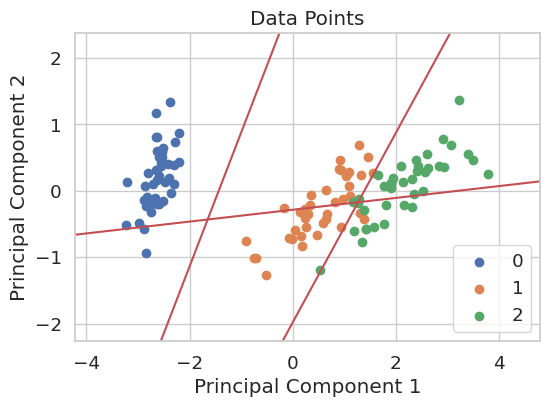

Training with polynomial degree 2
Degree: 2, Accuracy: 1.0


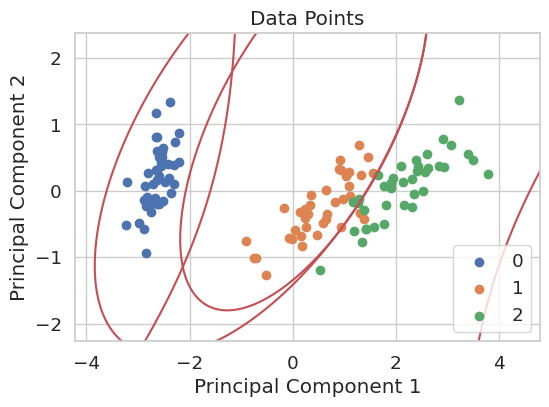

Training with polynomial degree 3
Degree: 3, Accuracy: 1.0


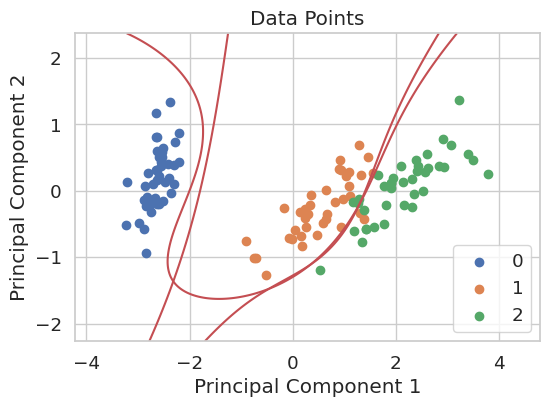

Training with polynomial degree 4
Degree: 4, Accuracy: 1.0


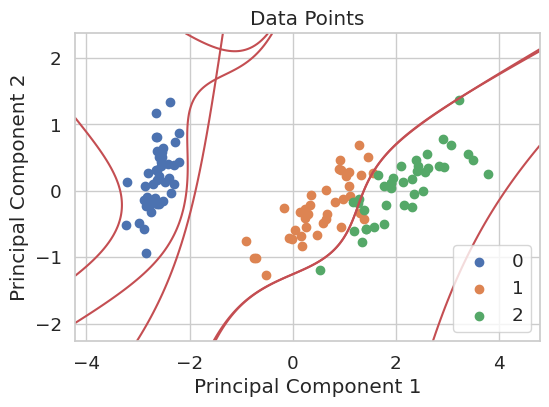

Training with polynomial degree 5
Degree: 5, Accuracy: 1.0


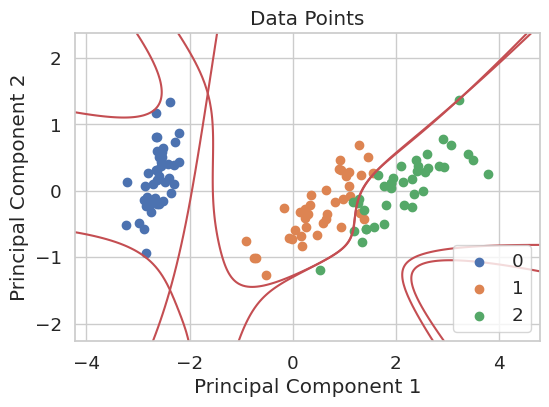

Training with polynomial degree 6
Degree: 6, Accuracy: 0.9666666666666667


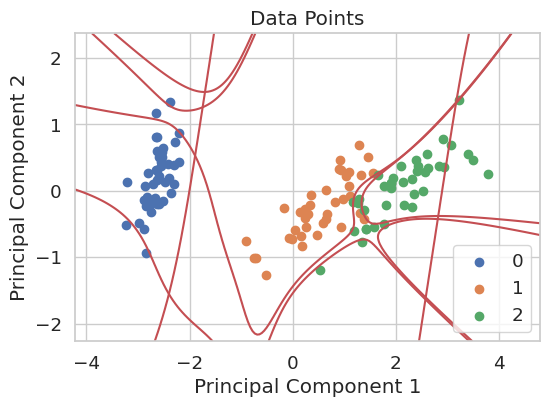

Training with polynomial degree 7
Degree: 7, Accuracy: 0.9666666666666667


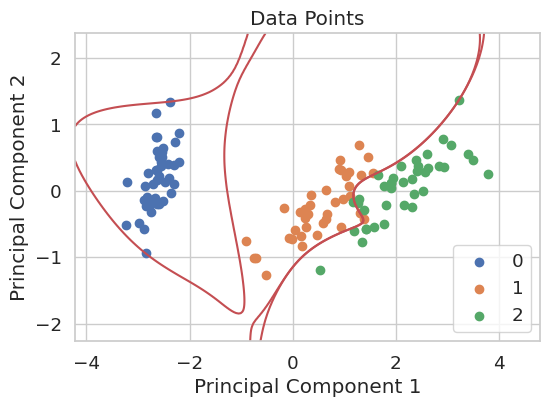

Training with polynomial degree 8
Degree: 8, Accuracy: 0.8333333333333334


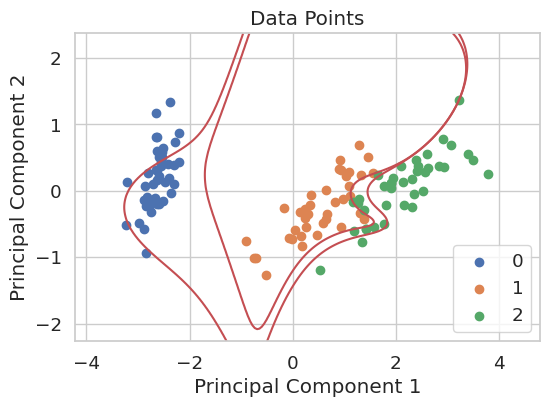

Training with polynomial degree 9
Degree: 9, Accuracy: 0.16666666666666666


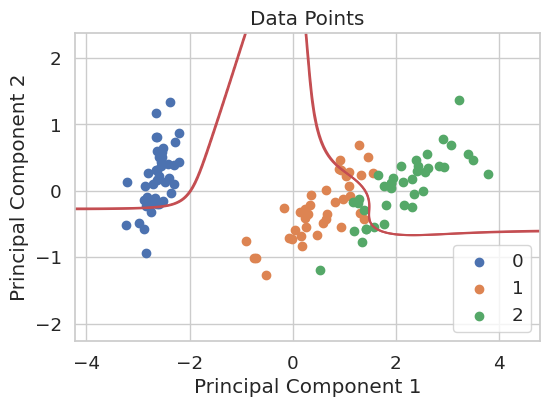

Training with polynomial degree 10
Degree: 10, Accuracy: 0.6


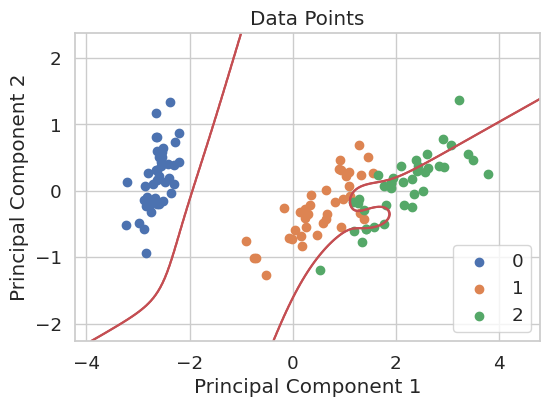

In [ ]:
iris = load_iris()
X = iris.data
y = iris.target

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=54)

accuracies = []

for degree in range(1, 11):
    print(f"Training with polynomial degree {degree}")
    predictions, kernel_and_params, w_catch, b_catch, classifiers = multiclass_svm(
        X_train, X_test, y_train, C=1.0, kernel_type='polynomial', poly_params=(1.0, degree)
    )
    accuracy = accuracy_score(y_test, predictions)
    accuracies.append(accuracy)
    print(f"Degree: {degree}, Accuracy: {accuracy}")

    visualize_multiclass_classification1(X_train, y_train, 'polynomial', True, classifiers, np.unique(y_train), w_catch, b_catch)


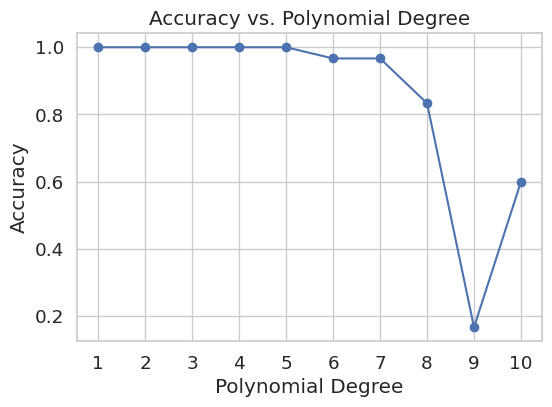

In [ ]:
plt.figure(figsize=(6, 4))
plt.plot(range(1, 11), accuracies, marker='o')
plt.title('Accuracy vs. Polynomial Degree')
plt.xlabel('Polynomial Degree')
plt.ylabel('Accuracy')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Training with polynomial degree 1
Degree: 1, Accuracy: 0.9666666666666667
Training with polynomial degree 2
Degree: 2, Accuracy: 0.9666666666666667
Training with polynomial degree 3
Degree: 3, Accuracy: 0.8666666666666667
Training with polynomial degree 4
Degree: 4, Accuracy: 0.8666666666666667
Training with polynomial degree 5
Degree: 5, Accuracy: 0.9
Training with polynomial degree 6
Degree: 6, Accuracy: 0.9333333333333333
Training with polynomial degree 7
Degree: 7, Accuracy: 0.8666666666666667
Training with polynomial degree 8
Degree: 8, Accuracy: 0.7333333333333333
Training with polynomial degree 9
Degree: 9, Accuracy: 0.1
Training with polynomial degree 10
Degree: 10, Accuracy: 0.5333333333333333
GIF saved to Google Drive at: /content/drive/MyDrive/svc_poly_degrees.gif


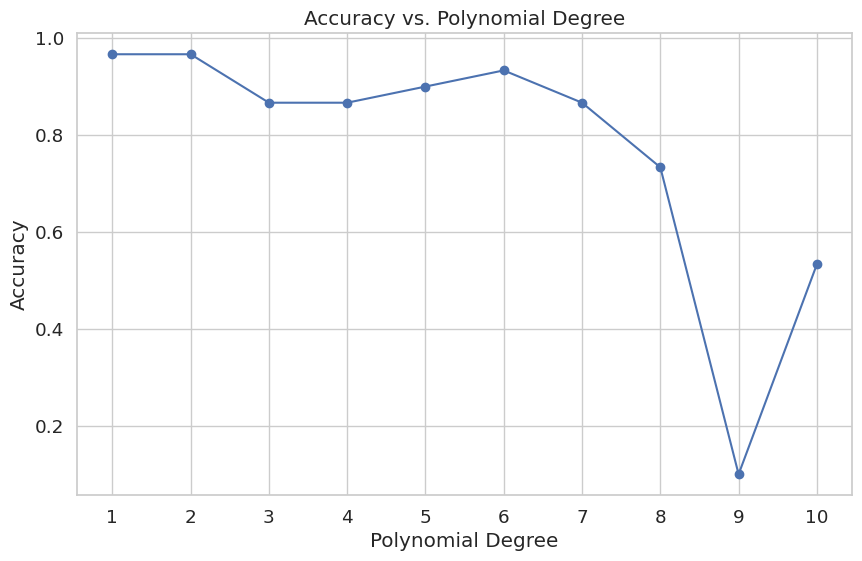

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import imageio
from google.colab import drive
from IPython.display import FileLink

# Mount Google Drive
drive.mount('/content/drive')

# Load and prepare the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Reduce to 2D using PCA for visualization purposes
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Helper functions for meshgrid and plotting
def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, classifiers, xx, yy, **params):
    Z = np.zeros(xx.shape)
    for label, clf in classifiers.items():
        Z += clf.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

# Custom visualization function for SVM
def visualize_multiclass_classification1(X_train, y_train1, kernel_type, classifiers, class_labels, w_stack, b_stack, epsilon=1e-10, ax=None):
    if ax is None:
        ax = plt.gca()

    # Plotting data points for each class
    for i, target_name in enumerate(class_labels):
        ax.scatter(X_train[y_train1 == i, 0], X_train[y_train1 == i, 1], label=target_name)

    if kernel_type == 'linear':
        for i in range(len(class_labels)):
            if w_stack[i] is None:
                continue
            w = w_stack[i]
            bias = b_stack[i]
            x_points = np.linspace(np.min(X_train[:, 0]) - 1, np.max(X_train[:, 0]) + 1, 200)
            y_points = -(w[0] / (w[1] + epsilon)) * x_points - bias / (w[1] + epsilon)
            ax.plot(x_points, y_points, c='r', label='Decision Boundary')

    elif kernel_type == 'polynomial':
        # Create a mesh grid
        x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
        y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
        xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200), np.linspace(y_min, y_max, 200))
        Z = np.zeros(xx.shape)
        for i in range(len(class_labels)):
            if i not in classifiers:
                continue
            Z = np.zeros(xx.shape)
            for j in range(xx.shape[0]):
                for k in range(xx.shape[1]):
                    sample_point = np.array([xx[j, k], yy[j, k]])
                    decision_value = 0
                    w, bias, a, sv_x, sv_y, kernel_and_params = classifiers[i]
                    for a1, sv_y1, sv1 in zip(a, sv_y, sv_x):
                        decision_value += a1 * sv_y1 * polynomial_kernel(sample_point, sv1, C=kernel_and_params[1][0], d=kernel_and_params[1][1])
                    decision_value += bias
                    Z[j, k] = decision_value
            ax.contour(xx, yy, Z, levels=[0], colors='r')

    ax.set_xlabel('Principal Component 1')
    ax.set_ylabel('Principal Component 2')
    ax.legend()
    ax.set_xlim(np.min(X_train[:, 0]) - 1, np.max(X_train[:, 0]) + 1)
    ax.set_ylim(np.min(X_train[:, 1]) - 1, np.max(X_train[:, 1]) + 1)

# Train SVM with polynomial kernel of varying degrees and visualize results
image_files = []
accuracies = []

for degree in range(1, 11):
    print(f"Training with polynomial degree {degree}")
    predictions, kernel_and_params, w_catch, b_catch, classifiers = multiclass_svm(
        X_train, X_test, y_train, C=1.0, kernel_type='polynomial', poly_params=(1.0, degree)
    )
    accuracy = accuracy_score(y_test, predictions)
    accuracies.append(accuracy)
    print(f"Degree: {degree}, Accuracy: {accuracy}")

    # Create mesh grid
    xx, yy = make_meshgrid(X_train[:, 0], X_train[:, 1])

    # Plot decision boundaries
    fig, ax = plt.subplots(figsize=(10, 8))
    visualize_multiclass_classification1(X_train, y_train, 'polynomial', classifiers, np.unique(y_train), w_catch, b_catch, ax=ax)
    ax.set_title(f'Degree: {degree}, Accuracy: {accuracy:.2f}')

    filename = f"svc_poly_degree_{degree}.png"
    plt.savefig(filename)
    image_files.append(filename)
    plt.close()

# Create a GIF from the saved images
images = []
for filename in image_files:
    images.append(imageio.imread(filename))

# Save GIF to Google Drive
gif_path = '/content/drive/MyDrive/svc_poly_degrees.gif'
imageio.mimsave(gif_path, images, duration=2)  # Duration in seconds for each frame

print("GIF saved to Google Drive at:", gif_path)
FileLink(gif_path)

# Plot the accuracies
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), accuracies, marker='o')
plt.title('Accuracy vs. Polynomial Degree')
plt.xlabel('Polynomial Degree')
plt.ylabel('Accuracy')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()


#Question 3

## section 3

### read the data

In [ ]:
!pip install --upgrade --no-cache-dir gdown
!gdown 1qrkHrJ0hYX4HzwjOUY9jPF5rZDrfywQQ
# https://drive.google.com/file/d/1qrkHrJ0hYX4HzwjOUY9jPF5rZDrfywQQ/view?usp=sharing

  Attempting uninstall: gdown
    Found existing installation: gdown 5.1.0
    Uninstalling gdown-5.1.0:
      Successfully uninstalled gdown-5.1.0
Downloading...
From (original): https://drive.google.com/uc?id=1qrkHrJ0hYX4HzwjOUY9jPF5rZDrfywQQ
From (redirected): https://drive.google.com/uc?id=1qrkHrJ0hYX4HzwjOUY9jPF5rZDrfywQQ&confirm=t&uuid=534afb36-da4e-4eb3-abe1-ce852642512e
To: /content/creditcard.csv
100% 151M/151M [00:03<00:00, 47.3MB/s]


In [ ]:
df = pd.read_csv('/content/creditcard.csv')
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [ ]:
df['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

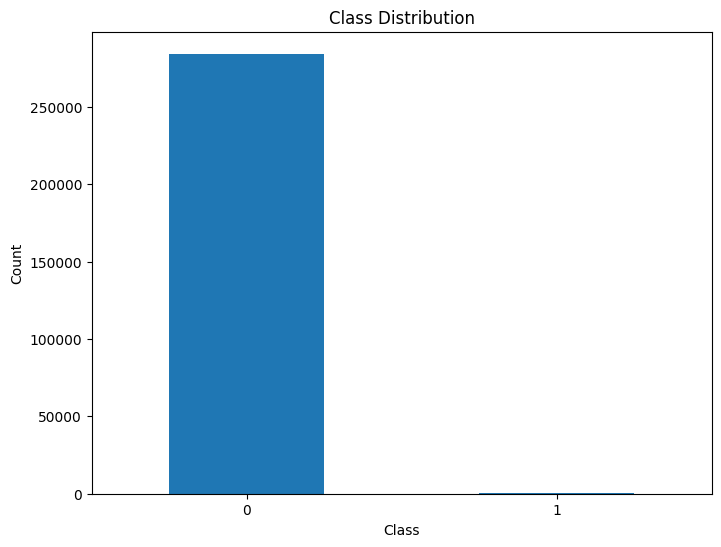

In [ ]:
class_counts = df['Class'].value_counts()

plt.figure(figsize=(8, 6))
class_counts.plot(kind='bar')
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

### preprocessing

In [ ]:
df.drop(['Time'], axis = 1, inplace = True)

In [ ]:
sc = StandardScaler()
df['Amount'] = sc.fit_transform(df[['Amount']])

In [ ]:
X = df.drop(['Class'], axis = 1)
y = df['Class']
X.shape, y.shape

((284807, 29), (284807,))

In [ ]:
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=54)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=54) # 0.25 * 0.8 = 0.2

In [ ]:
# Calculate percentages
train_percent = len(X_train) / len(X) * 100
val_percent = len(X_val) / len(X) * 100
test_percent = len(X_test) / len(X) * 100

# Display the shapes and percentages
shapes = {
    "X_train_shape": X_train.shape,
    "X_val_shape": X_val.shape,
    "X_test_shape": X_test.shape,
    "y_train_shape": y_train.shape,
    "y_val_shape": y_val.shape,
    "y_test_shape": y_test.shape
}

percentages = {
    "train_percent": train_percent,
    "val_percent": val_percent,
    "test_percent": test_percent
}
shapes, percentages

({'X_train_shape': (170883, 29),
  'X_val_shape': (56962, 29),
  'X_test_shape': (56962, 29),
  'y_train_shape': (170883,),
  'y_val_shape': (56962,),
  'y_test_shape': (56962,)},
 {'train_percent': 59.99957866204131,
  'val_percent': 20.000210668979342,
  'test_percent': 20.000210668979342})

### apply SMOTE only on training

In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy='minority', random_state = 54)
X_train, y_train = smote.fit_resample(X_train, y_train)

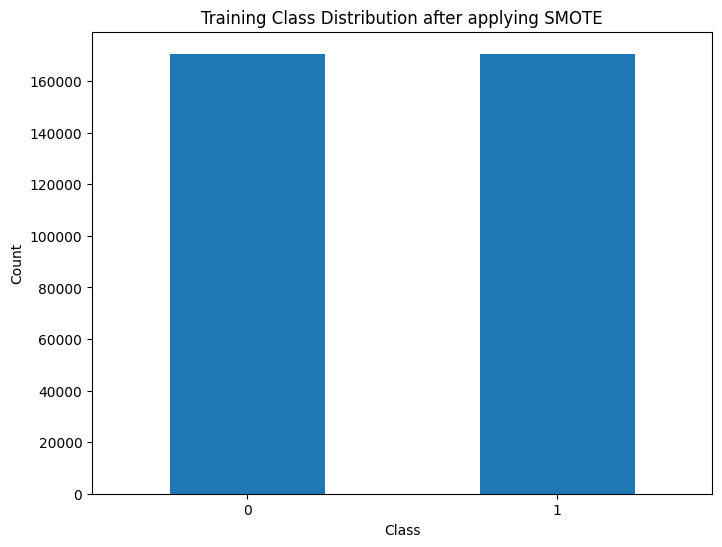

In [ ]:
class_counts = y_train.value_counts()

plt.figure(figsize=(8, 6))
class_counts.plot(kind='bar')
plt.title('Training Class Distribution after applying SMOTE')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

In [ ]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train, num_classes=2)
y_val = to_categorical(y_val, num_classes=2)
y_test = to_categorical(y_test, num_classes=2)

In [ ]:
y_train.shape

(341198, 2)

### Add noise to the data

In [ ]:
noise_factor = 0.2
X_train_noisy = X_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=X_train.shape)
X_val_noisy = X_val + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=X_val.shape)
X_test_noisy = X_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=X_test.shape)

### define the Autoencoder for denoising

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.callbacks import ModelCheckpoint

# Build the denoising autoencoder
input_dim = X_train.shape[1]

input_layer = Input(shape=(input_dim,))
encoded = Dense(22, activation='relu')(input_layer)
encoded = Dense(15, activation='relu')(encoded)
encoded = Dense(10, activation='relu')(encoded)
decoded = Dense(15, activation='relu')(encoded)
decoded = Dense(22, activation='relu')(decoded)
output_layer = Dense(input_dim, activation='sigmoid')(decoded)

autoencoder = Model(input_layer, output_layer)
autoencoder.compile(optimizer='adam', loss='mse')

# Define checkpoint callback to save the best autoencoder model
autoencoder_checkpoint = ModelCheckpoint('best_autoencoder.h5', monitor='val_loss', save_best_only=True, mode='min')

# Train the autoencoder
autoencoder.fit(X_train_noisy,
                X_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(X_val, X_val),
                callbacks=[autoencoder_checkpoint],
                verbose = 1)


Epoch 1/50
1333/1333 [==============================] - 8s 4ms/step - loss: 14.0489 - val_loss: 0.9967
Epoch 2/50
1333/1333 [==============================] - 3s 2ms/step - loss: 13.9614 - val_loss: 0.9604
Epoch 3/50
1333/1333 [==============================] - 4s 3ms/step - loss: 13.9294 - val_loss: 0.9345
Epoch 4/50
1333/1333 [==============================] - 3s 3ms/step - loss: 13.9154 - val_loss: 0.9226
Epoch 5/50
1333/1333 [==============================] - 3s 2ms/step - loss: 13.9050 - val_loss: 0.9140
Epoch 6/50
1333/1333 [==============================] - 3s 2ms/step - loss: 13.8994 - val_loss: 0.9068
Epoch 7/50
1333/1333 [==============================] - 4s 3ms/step - loss: 13.8940 - val_loss: 0.8948
Epoch 8/50
1333/1333 [==============================] - 4s 3ms/step - loss: 13.8864 - val_loss: 0.8876
Epoch 9/50
1333/1333 [==============================] - 3s 2ms/step - loss: 13.8838 - val_loss: 0.8846
Epoch 10/50
1333/1333 [==============================] - 3s 2ms/step - lo

In [ ]:
# Load the best autoencoder model
autoencoder.load_weights('best_autoencoder.h5')
# Denoise the training, validation, and test sets
X_train_denoised = autoencoder.predict(X_train_noisy)
X_val_denoised = autoencoder.predict(X_val_noisy)
X_test_denoised = autoencoder.predict(X_test_noisy)

1781/1781 [==============================] - 7s 4ms/step


In [ ]:
X_train_denoised.shape, y_train.shape, y_val.shape

((341198, 29), (341198, 2), (56962, 2))

### define the neural network classifier

In [ ]:
# Build the classification model
classifier_input = Input(shape=(input_dim,))
x = Dense(22, activation='relu')(classifier_input)
x = Dense(15, activation='relu')(x)
x = Dense(10, activation='relu')(x)
x = Dense(5, activation='relu')(x)
x = Dense(2, activation='softmax')(x)

classifier = Model(classifier_input, x)
classifier.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Define checkpoint callback to save the best classifier model
classifier_checkpoint = ModelCheckpoint('best_classifier.h5', monitor='val_loss', save_best_only=True, mode='min')

# Train the classifier
classifier.fit(X_train_denoised,
               y_train,
               epochs=50,
               batch_size=256,
               shuffle = True,
               validation_data=(X_val_denoised, y_val),
               callbacks=[classifier_checkpoint],
               verbose = 1)


Epoch 1/50
1333/1333 [==============================] - 6s 3ms/step - loss: 0.1319 - accuracy: 0.9515 - val_loss: 0.0892 - val_accuracy: 0.9700
Epoch 2/50
1333/1333 [==============================] - 4s 3ms/step - loss: 0.0823 - accuracy: 0.9674 - val_loss: 0.0529 - val_accuracy: 0.9832
Epoch 3/50
1333/1333 [==============================] - 4s 3ms/step - loss: 0.0743 - accuracy: 0.9704 - val_loss: 0.0598 - val_accuracy: 0.9791
Epoch 4/50
1333/1333 [==============================] - 3s 2ms/step - loss: 0.0703 - accuracy: 0.9721 - val_loss: 0.0706 - val_accuracy: 0.9734
Epoch 5/50
1333/1333 [==============================] - 3s 2ms/step - loss: 0.0682 - accuracy: 0.9727 - val_loss: 0.0739 - val_accuracy: 0.9715
Epoch 6/50
1333/1333 [==============================] - 3s 2ms/step - loss: 0.0666 - accuracy: 0.9734 - val_loss: 0.0693 - val_accuracy: 0.9735
Epoch 7/50
1333/1333 [==============================] - 4s 3ms/step - loss: 0.0652 - accuracy: 0.9741 - val_loss: 0.0720 - val_accuracy:

## section 4

1781/1781 [==============================] - 4s 2ms/step
Accuracy: 98.53%
F1 Score: 0.16
Recall: 0.82
Precision: 0.09


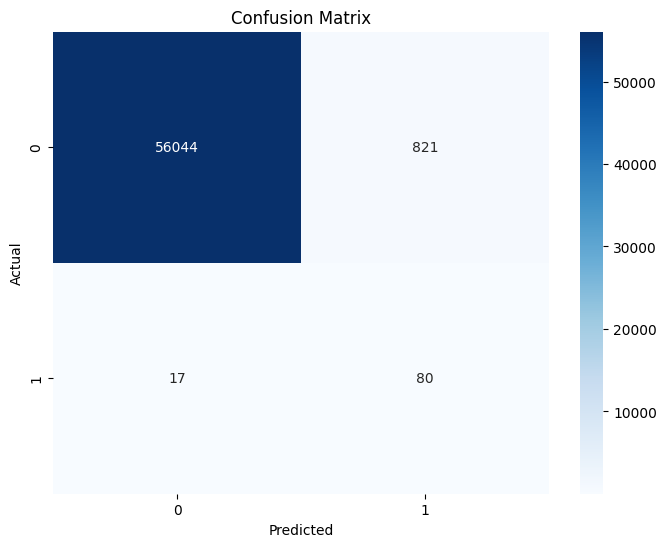

In [ ]:
# Load the best classifier model
classifier.load_weights('best_classifier.h5')

# Predict on the denoised validation set
y_val_pred = classifier.predict(X_val_denoised)
y_val_pred_classes = np.argmax(y_val_pred, axis=1)
y_val_true_classes = np.argmax(y_val, axis=1)

# Calculate metrics for the validation set
conf_matrix = confusion_matrix(y_val_true_classes, y_val_pred_classes)
accuracy = accuracy_score(y_val_true_classes, y_val_pred_classes)
f1 = f1_score(y_val_true_classes, y_val_pred_classes)
recall = recall_score(y_val_true_classes, y_val_pred_classes)
precision = precision_score(y_val_true_classes, y_val_pred_classes)

# Print metrics
print(f'Accuracy: {accuracy*100:.2f}%')
print(f'F1 Score: {f1:.2f}')
print(f'Recall: {recall:.2f}')
print(f'Precision: {precision:.2f}')

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Accuracy: 98.47%
F1 Score: 0.18
Recall: 0.85
Precision: 0.10
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56851
           1       0.10      0.85      0.18       111

    accuracy                           0.98     56962
   macro avg       0.55      0.92      0.58     56962
weighted avg       1.00      0.98      0.99     56962



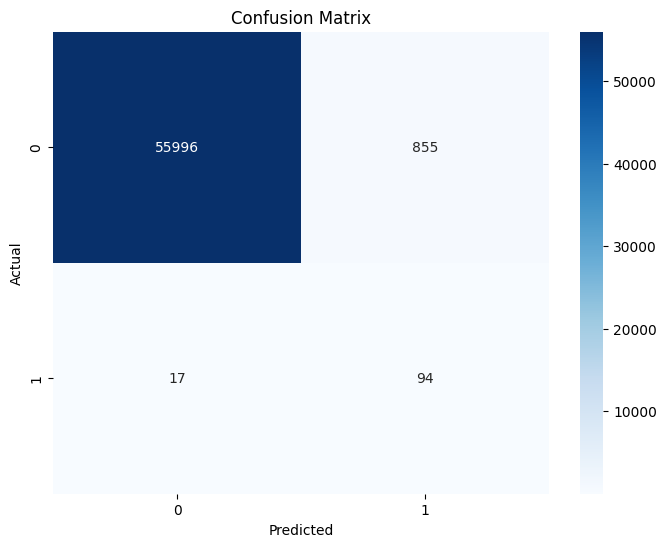

In [ ]:
# Load the best classifier model
classifier.load_weights('best_classifier.h5')

# Predict on the denoised test set
y_test_pred = classifier.predict(X_test_denoised)
y_test_pred_classes = np.argmax(y_test_pred, axis=1)

y_test_true_classes = np.argmax(y_test, axis=1)

# Calculate metrics
conf_matrix = confusion_matrix(y_test_true_classes, y_test_pred_classes)
accuracy = accuracy_score(y_test_true_classes, y_test_pred_classes)
f1 = f1_score(y_test_true_classes, y_test_pred_classes)
recall = recall_score(y_test_true_classes, y_test_pred_classes)
precision = precision_score(y_test_true_classes, y_test_pred_classes)

# Print metrics
print(f'Accuracy: {accuracy*100:.2f}%')
print(f'F1 Score: {f1:.2f}')
print(f'Recall: {recall:.2f}')
print(f'Precision: {precision:.2f}')

print(classification_report(y_test_true_classes, y_test_pred_classes))
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## section 5

### different treshhods for the model

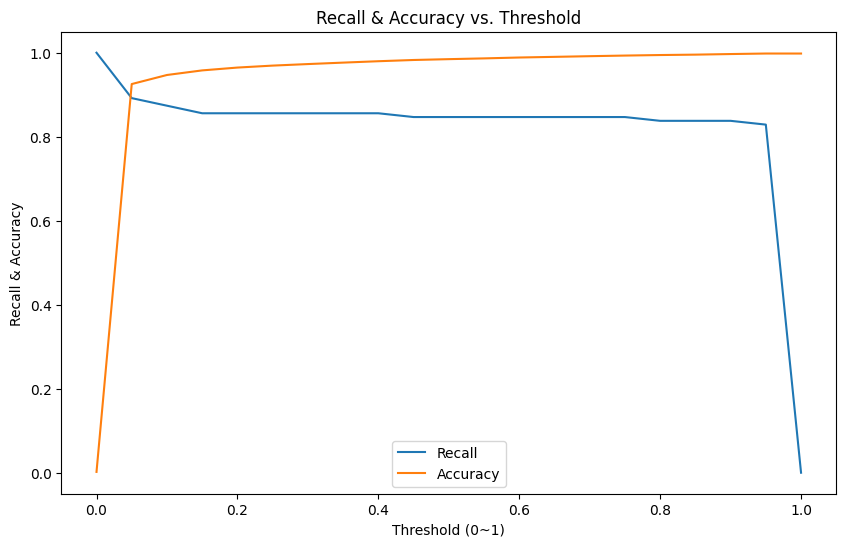

In [ ]:
thresholds = np.arange(0.0, 1.05, 0.05)

recalls = []
accuracies = []
for threshold in thresholds:
    y_pred = (y_test_pred[:, 1] >= threshold).astype(int)
    recall = recall_score(np.argmax(y_test, axis=1), y_pred)
    accuracy = accuracy_score(np.argmax(y_test, axis=1), y_pred)
    recalls.append(recall)
    accuracies.append(accuracy)

plt.figure(figsize=(10, 6))
plt.plot(thresholds, recalls, label='Recall')
plt.plot(thresholds, accuracies, label='Accuracy')
plt.xlabel('Threshold (0~1)')
plt.ylabel('Recall & Accuracy')
plt.title('Recall & Accuracy vs. Threshold')
plt.legend()
plt.show()


### different sampling strategies for SMOTE

In [ ]:
y_train.shape

(170883,)

In [ ]:
y_train = to_categorical(y_train, num_classes=2)
y_val = to_categorical(y_val, num_classes=2)
y_test = to_categorical(y_test, num_classes=2)

Resampled dataset shape with strategy 0.1: (187658, 29) (187658, 2)
Epoch 1/20
734/734 [==============================] - 7s 6ms/step - loss: 3.4577 - val_loss: 1.0560
Epoch 2/20
734/734 [==============================] - 4s 5ms/step - loss: 3.3966 - val_loss: 1.0413
Epoch 3/20
734/734 [==============================] - 2s 3ms/step - loss: 3.3802 - val_loss: 1.0361
Epoch 4/20
734/734 [==============================] - 2s 3ms/step - loss: 3.3759 - val_loss: 1.0305
Epoch 5/20
734/734 [==============================] - 2s 3ms/step - loss: 3.3698 - val_loss: 1.0256
Epoch 6/20
734/734 [==============================] - 2s 3ms/step - loss: 3.3580 - val_loss: 1.0113
Epoch 7/20
734/734 [==============================] - 3s 3ms/step - loss: 3.3484 - val_loss: 0.9940
Epoch 8/20
734/734 [==============================] - 3s 4ms/step - loss: 3.3358 - val_loss: 0.9913
Epoch 9/20
734/734 [==============================] - 2s 3ms/step - loss: 3.3327 - val_loss: 0.9846
Epoch 10/20
734/734 [===========

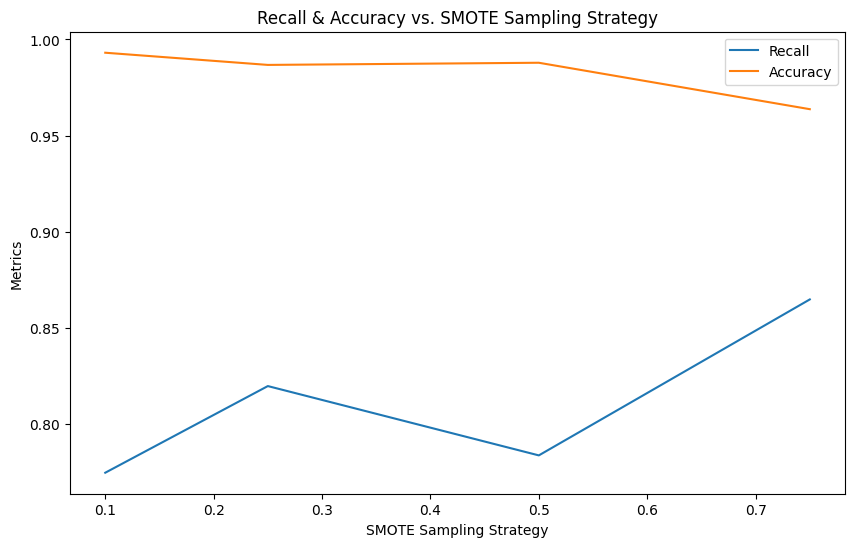

In [ ]:
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=54)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=54) # 0.25 * 0.8 = 0.2

y_train = to_categorical(y_train, num_classes=2)
y_val = to_categorical(y_val, num_classes=2)
y_test = to_categorical(y_test, num_classes=2)

sampling_strategies = [0.1, 0.25, 0.5, 0.75]

results = []

for strategy in sampling_strategies:
    # Apply SMOTE with the current sampling strategy
    smote = SMOTE(sampling_strategy=strategy, random_state=64)
    X_train_res, y_train_res = smote.fit_resample(X_train, np.argmax(y_train, axis=1))
    y_train_res = to_categorical(y_train_res, num_classes=2)

    print(f'Resampled dataset shape with strategy {strategy}:', X_train_res.shape, y_train_res.shape)

    # Adding Gaussian noise to the data
    def add_noise(data, noise_factor=0.2):
        noisy_data = data + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=data.shape)
        noisy_data = np.clip(noisy_data, 0., 1.)
        return noisy_data

    X_train_noisy = add_noise(X_train_res)
    X_val_noisy = add_noise(X_val)

    # Define the autoencoder model
    input_dim = X_train_res.shape[1]
    encoding_dim = 10

    input_layer = Input(shape=(input_dim,))
    encoder = Dense(encoding_dim, activation="relu")(input_layer)
    encoder = Dense(22, activation="relu")(encoder)
    encoder = Dense(15, activation="relu")(encoder)
    encoder = Dense(encoding_dim, activation="relu")(encoder)
    encoder = Dense(15, activation="relu")(encoder)
    encoder = Dense(22, activation="relu")(encoder)
    decoder = Dense(input_dim, activation='sigmoid')(encoder)

    autoencoder = Model(inputs=input_layer, outputs=decoder)
    autoencoder.compile(optimizer='adam', loss='mean_squared_error')

    # Train the autoencoder
    autoencoder.fit(X_train_noisy, X_train_res,
                    epochs=20,
                    batch_size=256,
                    shuffle=True,
                    validation_data=(X_val_noisy, X_val),
                    verbose=1)

    # Denoise the data
    X_train_denoised = autoencoder.predict(X_train_noisy)
    X_valid_denoised = autoencoder.predict(X_val_noisy)

    # Define the classifier model
    classifier_input = Input(shape=(input_dim,))
    classifier_layer = Dense(encoding_dim, activation="relu")(classifier_input)
    classifier_layer = Dense(22, activation="relu")(classifier_layer)
    classifier_layer = Dense(15, activation="relu")(classifier_layer)
    classifier_layer = Dense(10, activation="relu")(classifier_layer)
    classifier_layer = Dense(5, activation="relu")(classifier_layer)
    classifier_layer = Dense(2, activation='softmax')(classifier_layer)  # Two neurons with softmax activation

    classifier = Model(inputs=classifier_input, outputs=classifier_layer)
    classifier.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])  # Categorical crossentropy loss

    # Train the classifier
    classifier.fit(X_train_denoised, y_train_res,
                   epochs=20,
                   batch_size=256,
                   shuffle=True,
                   validation_data=(X_val_denoised, y_val),
                   verbose=1)

    # Evaluate the classifier on the test set
    X_test_noisy = add_noise(X_test)
    X_test_denoised = autoencoder.predict(X_test_noisy)

    # Predict probabilities
    y_pred_prob = classifier.predict(X_test_denoised)

    # Define a fixed threshold for classification
    threshold = 0.5
    y_pred = (y_pred_prob[:, 1] >= threshold).astype(int)

    # Calculate recall and accuracy
    recall = recall_score(np.argmax(y_test, axis=1), y_pred)
    accuracy = accuracy_score(np.argmax(y_test, axis=1), y_pred)
    results.append({'SMOTE Threshold': strategy, 'Recall Rate': recall, 'Accuracy': accuracy})

# Create a DataFrame for the results
results_df = pd.DataFrame(results)

# Display the results
print(results_df)

# Plot recall and accuracy against SMOTE sampling strategies
plt.figure(figsize=(10, 6))
plt.plot(results_df['SMOTE Threshold'], results_df['Recall Rate'], label='Recall')
plt.plot(results_df['SMOTE Threshold'], results_df['Accuracy'], label='Accuracy')
plt.xlabel('SMOTE Sampling Strategy')
plt.ylabel('Metrics')
plt.title('Recall & Accuracy vs. SMOTE Sampling Strategy')
plt.legend()
plt.show()

## section 6

### building the classifier

Epoch 1/20
668/668 [==============================] - 13s 14ms/step - loss: 0.0387 - accuracy: 0.9946 - val_loss: 0.0066 - val_accuracy: 0.9986
Epoch 2/20
668/668 [==============================] - 4s 6ms/step - loss: 0.0062 - accuracy: 0.9982 - val_loss: 0.0040 - val_accuracy: 0.9986
Epoch 3/20
668/668 [==============================] - 4s 5ms/step - loss: 0.0047 - accuracy: 0.9986 - val_loss: 0.0035 - val_accuracy: 0.9995
Epoch 4/20
668/668 [==============================] - 3s 5ms/step - loss: 0.0042 - accuracy: 0.9992 - val_loss: 0.0032 - val_accuracy: 0.9995
Epoch 5/20
668/668 [==============================] - 3s 4ms/step - loss: 0.0039 - accuracy: 0.9993 - val_loss: 0.0032 - val_accuracy: 0.9995
Epoch 6/20
668/668 [==============================] - 2s 3ms/step - loss: 0.0038 - accuracy: 0.9993 - val_loss: 0.0032 - val_accuracy: 0.9995
Epoch 7/20
668/668 [==============================] - 2s 3ms/step - loss: 0.0037 - accuracy: 0.9993 - val_loss: 0.0031 - val_accuracy: 0.9995
Epoc

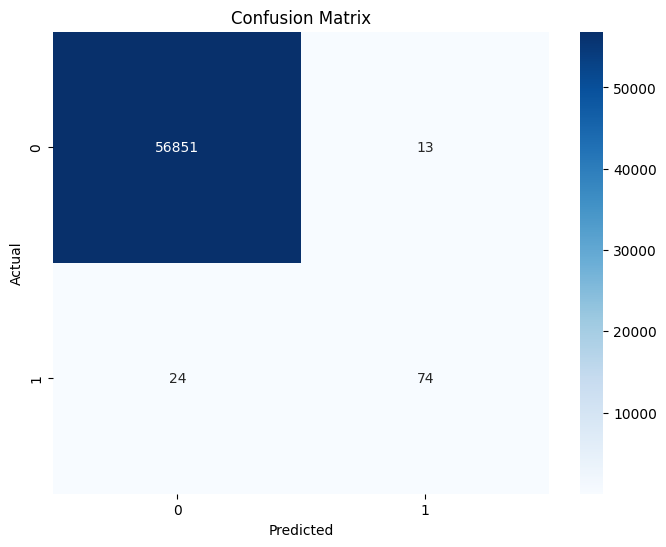

In [ ]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import recall_score, accuracy_score, confusion_matrix, f1_score, precision_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the dataset
df = pd.read_csv('/content/creditcard.csv')  # Replace with your actual file path

# Drop 'TIME' and normalize 'AMOUNT'
df = df.drop(columns=['Time'])
scaler = StandardScaler()
df['Amount'] = scaler.fit_transform(df[['Amount']])

# Split features and target
X = df.drop(columns=['Class'])
y = df['Class']

# Split into train, validation, and test sets (60%, 20%, 20%)
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)  # 0.25 * 0.8 = 0.2

# Convert labels to categorical format
y_train = to_categorical(y_train, num_classes=2)
y_val = to_categorical(y_val, num_classes=2)
y_test = to_categorical(y_test, num_classes=2)

# Add Gaussian noise to the data
def add_noise(data, noise_factor=0.2):
    noisy_data = data + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=data.shape)
    noisy_data = np.clip(noisy_data, 0., 1.)
    return noisy_data

X_train_noisy = add_noise(X_train)
X_val_noisy = add_noise(X_val)
X_test_noisy = add_noise(X_test)

# Define the classifier model
input_dim = X_train.shape[1]
classifier_input = Input(shape=(input_dim,))
classifier_layer = Dense(22, activation="relu")(classifier_input)
classifier_layer = Dense(15, activation="relu")(classifier_layer)
classifier_layer = Dense(10, activation="relu")(classifier_layer)
classifier_layer = Dense(5, activation="relu")(classifier_layer)
classifier_layer = Dense(2, activation='softmax')(classifier_layer)

classifier = Model(inputs=classifier_input, outputs=classifier_layer)
classifier.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the classifier
classifier.fit(X_train_noisy, y_train,
               epochs=20,
               batch_size=256,
               shuffle=True,
               validation_data=(X_val_noisy, y_val),
               verbose=1)

# Predict probabilities on the test set
y_pred_prob = classifier.predict(X_test_noisy)

# Define a fixed threshold for classification
threshold = 0.5
y_pred = (y_pred_prob[:, 1] >= threshold).astype(int)

# Calculate recall, accuracy, F1 score, precision, and confusion matrix
recall = recall_score(np.argmax(y_test, axis=1), y_pred)
accuracy = accuracy_score(np.argmax(y_test, axis=1), y_pred)
f1 = f1_score(np.argmax(y_test, axis=1), y_pred)
precision = precision_score(np.argmax(y_test, axis=1), y_pred)
conf_matrix = confusion_matrix(np.argmax(y_test, axis=1), y_pred)

# Print metrics
print(f'Accuracy: {accuracy*100:.2f}%')
print(f'F1 Score: {f1:.2f}')
print(f'Recall: {recall:.2f}')
print(f'Precision: {precision:.2f}')
print(classification_report(np.argmax(y_test, axis=1), y_pred))

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


### sweeping treshhold

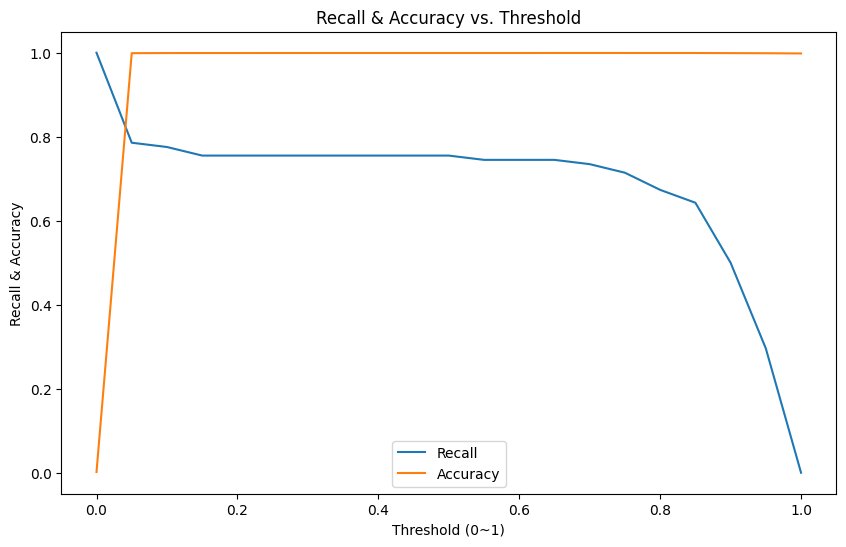

In [ ]:
# Sweep the threshold and calculate recall and accuracy
thresholds = np.arange(0.0, 1.05, 0.05)
recalls = []
accuracies = []

for threshold in thresholds:
    y_pred = (y_pred_prob[:, 1] >= threshold).astype(int)
    recall = recall_score(np.argmax(y_test, axis=1), y_pred)
    accuracy = accuracy_score(np.argmax(y_test, axis=1), y_pred)
    recalls.append(recall)
    accuracies.append(accuracy)

# Plot recall and accuracy against thresholds
plt.figure(figsize=(10, 6))
plt.plot(thresholds, recalls, label='Recall')
plt.plot(thresholds, accuracies, label='Accuracy')
plt.xlabel('Threshold (0~1)')
plt.ylabel('Recall & Accuracy')
plt.title('Recall & Accuracy vs. Threshold')
plt.legend()
plt.show()
